In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # seaborn用于绘制热图

from tools import DCCA, show_DCCA_heatmap, compute_dcca_distances


# 1. 下载数据

In [2]:
# GSPC, GSPTSE, FCHI, DAX Performance Index, FTSEMIB, N225, FTSE
# China (HSI) and Russia (IMOEX)
# 下载数据
#data = yf.download(['^GSPC', '^GSPTSE', '^FCHI', '^GDAXI', 'FTSEMIB.MI', '^N225', '^FTSE', '^HSI', 'IMOEX.ME'], start='2013-03-05', end='2023-05-30')

In [3]:
#data = data.rename(columns={'FTSEMIB.MI':'IT', 'IMOEX.ME':'RU', '^FCHI':'FR', '^FTSE':'UK', '^GDAXI':'DE', '^GSPC':'US', '^GSPTSE':'CA', '^HSI':'CN', '^N225':'JP'})
#data =data['Adj Close']

In [4]:
#data.reset_index(inplace=True)
#data.to_feather('data.feather')

In [5]:
data = pd.read_feather('data.feather')
data.set_index('Date', inplace=True)
data.head()

Ticker                          IT           RU           FR           UK  \
Date                                                                        
2013-03-05 00:00:00+00:00  15974.0  1486.420044  3787.189941  6432.000000   
2013-03-06 00:00:00+00:00  15900.0  1491.489990  3773.760010  6427.600098   
2013-03-07 00:00:00+00:00  15947.0  1491.349976  3793.780029  6439.200195   
2013-03-08 00:00:00+00:00  16204.0          NaN  3840.149902  6483.600098   
2013-03-11 00:00:00+00:00  16092.0  1505.930054  3836.270020  6503.600098   

Ticker                              DE           US            CA  \
Date                                                                
2013-03-05 00:00:00+00:00  7870.310059  1539.790039  12736.000000   
2013-03-06 00:00:00+00:00  7919.330078  1541.459961  12832.000000   
2013-03-07 00:00:00+00:00  7939.770020  1544.260010  12826.500000   
2013-03-08 00:00:00+00:00  7986.470215  1551.180054  12835.599609   
2013-03-11 00:00:00+00:00  7984.290039  1556.219971  12858.500000   

Ticker                               CN            JP  
Date                                                   
2013-03-05 00:00:00+00:00  22560.500000  11683.450195  
2013-03-06 00:00:00+00:00  22777.839844  11932.269531  
2013-03-07 00:00:00+00:00  22771.439453  11968.080078  
2013-03-08 00:00:00+00:00  23091.949219  12283.620117  
2013-03-11 00:00:00+00:00  23090.820312  12349.049805

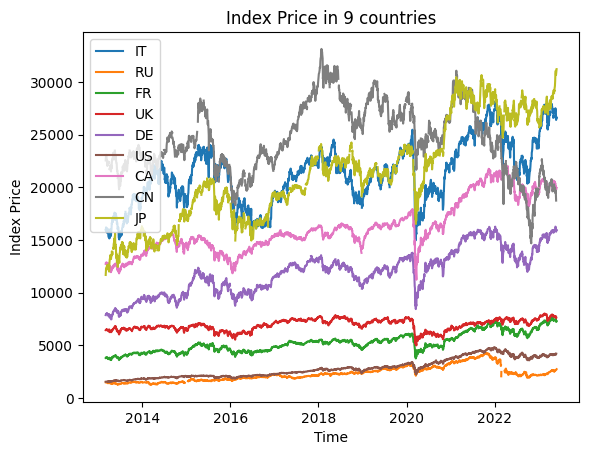

In [6]:
# 把data绘图
plt.plot(data)
plt.title('Index Price in 9 countries')
plt.xlabel('Time')
plt.ylabel('Index Price')
plt.legend(['IT', 'RU', 'FR', 'UK', 'DE', 'US', 'CA', 'CN', 'JP'])
plt.show()

In [7]:
# 对每一个市场指数进行标准化处理，使得mean为0，std为1
# normalized_data = (data - data.mean()) / data.std()
# normalized_data = data

In [8]:
# 先取对数
data = data.fillna(method='ffill')
log_returns = np.log(data / data.shift(1))

log_returns.dropna(inplace=True)

In [9]:
#cleaned_log_returns = log_returns.dropna()
#cleaned_log_returns = log_returns.fillna(method='ffill')

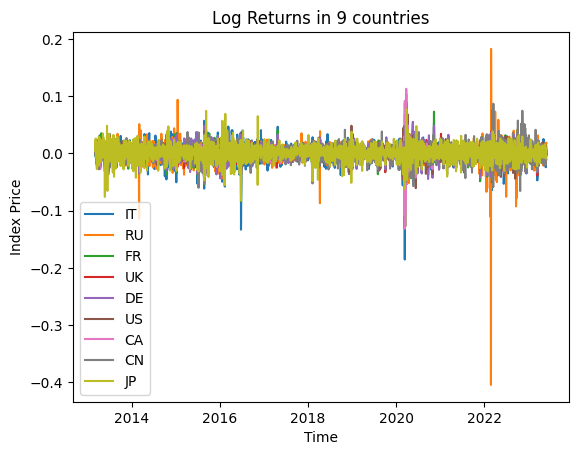

In [10]:
plt.plot(log_returns)
plt.title('Log Returns in 9 countries')
plt.xlabel('Time')
plt.ylabel('Index Price')
plt.legend(['IT', 'RU', 'FR', 'UK', 'DE', 'US', 'CA', 'CN', 'JP'])
plt.show()

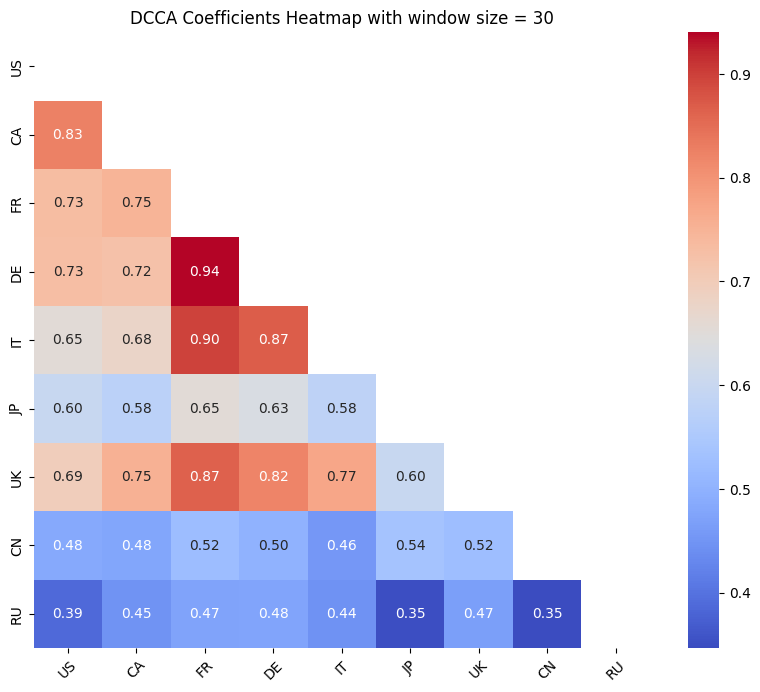

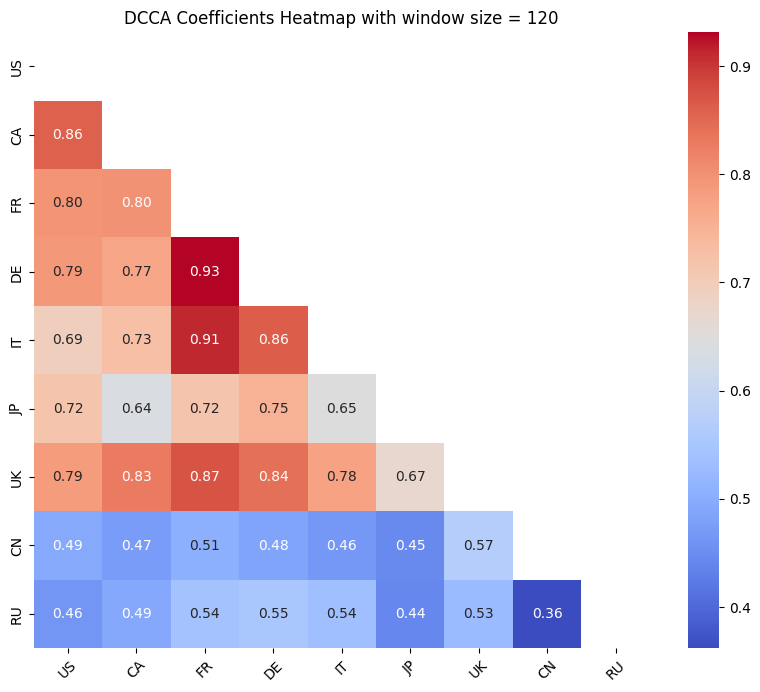

In [11]:
show_DCCA_heatmap(log_returns, 30)
show_DCCA_heatmap(log_returns, 120)

In [12]:
# 把时间序列转化为numpy数组格式
cleaned_log_returns_array = log_returns.values
cleaned_log_returns_array.shape

(2662, 9)

In [13]:
rho_DCCA_matrixdist, rho_DCCA_matrixnodist = compute_dcca_distances(cleaned_log_returns_array, 10, 250)

In [16]:
np.save('rho_DCCA_matrixdist.npy', rho_DCCA_matrixdist)
np.save('rho_DCCA_matrixnodist.npy', rho_DCCA_matrixnodist)

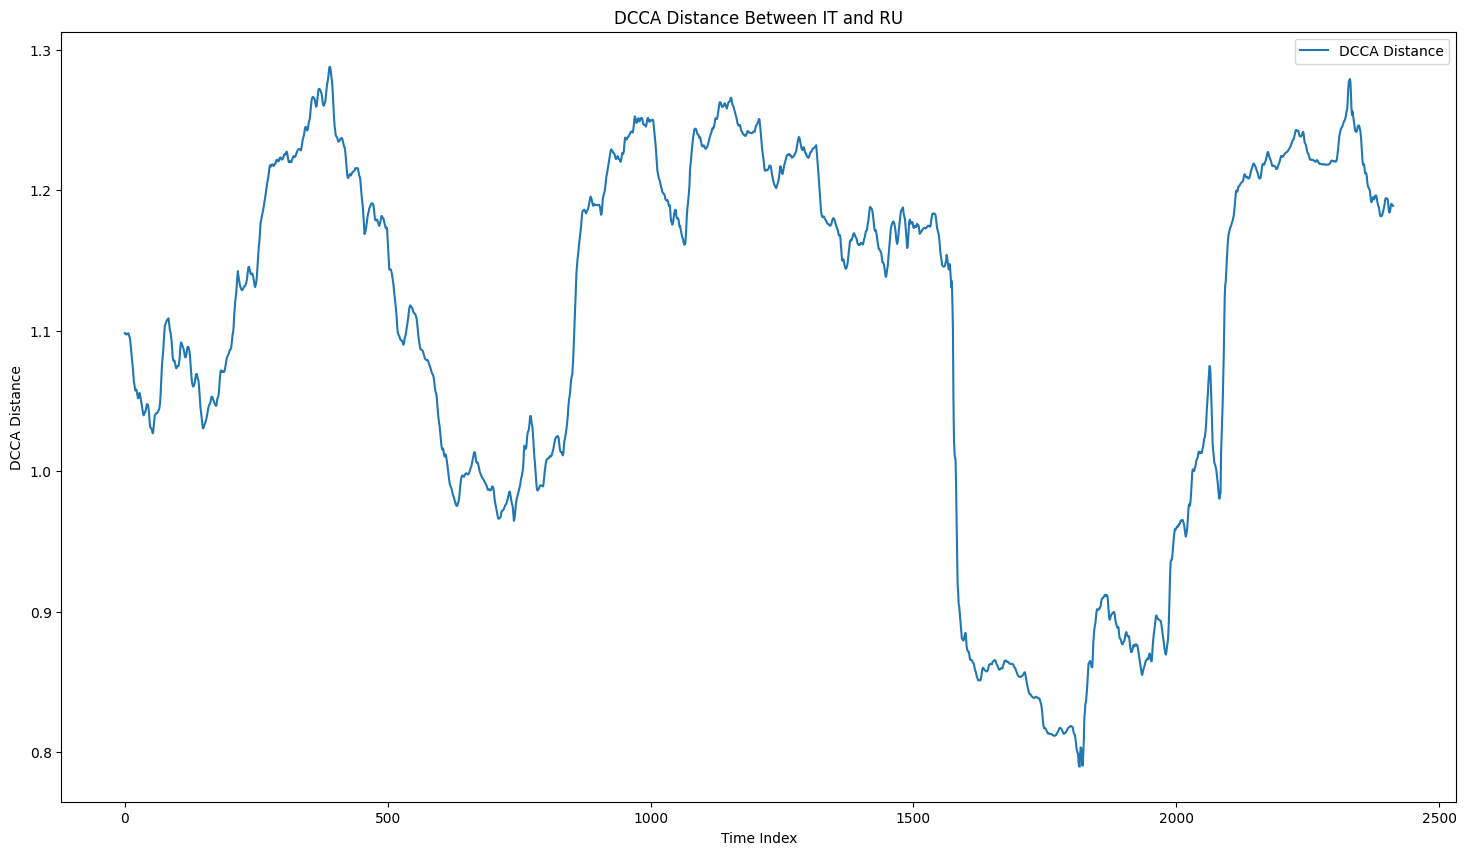

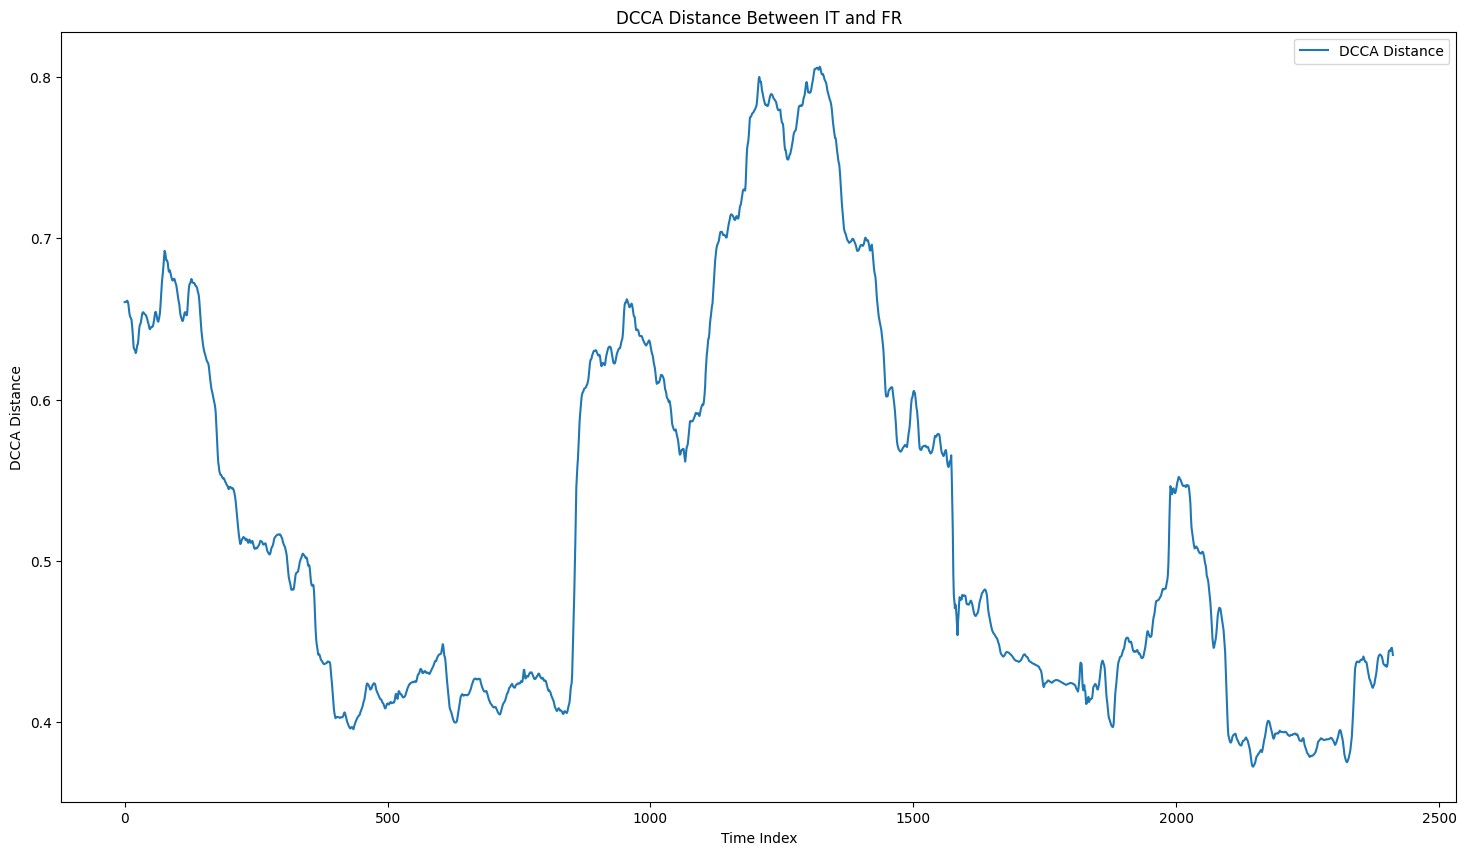

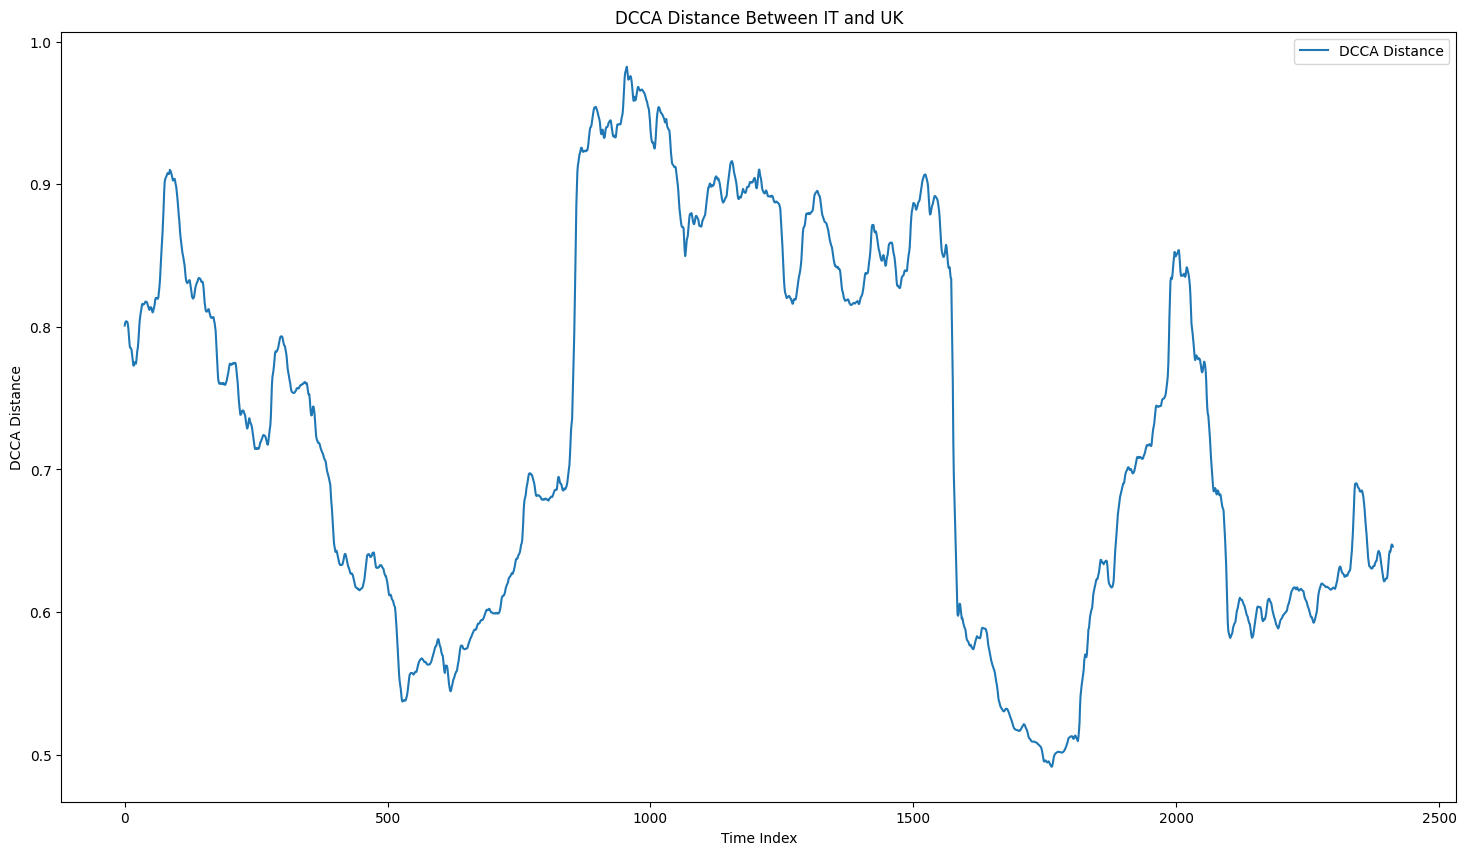

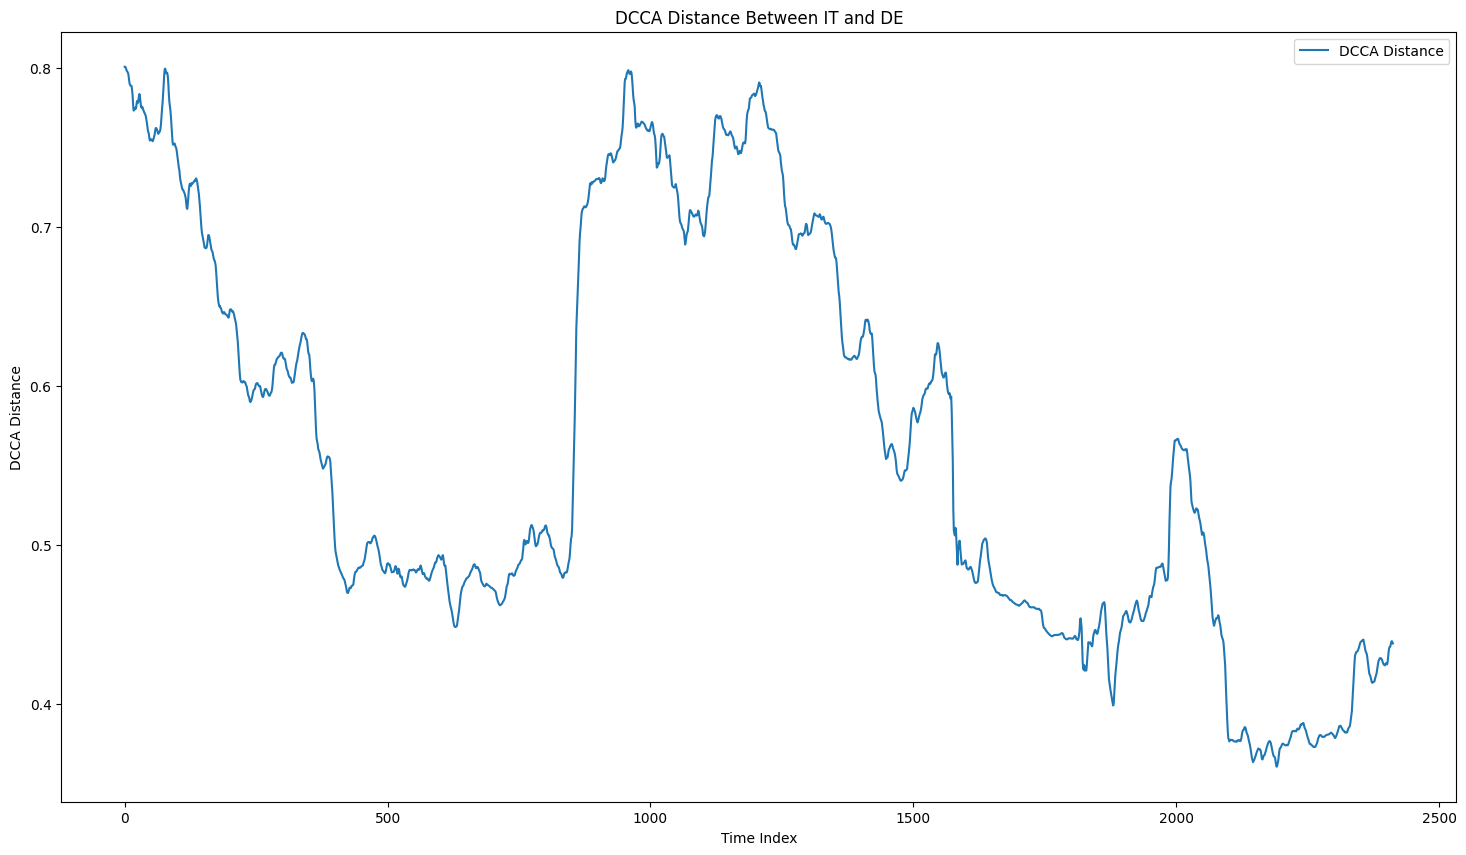

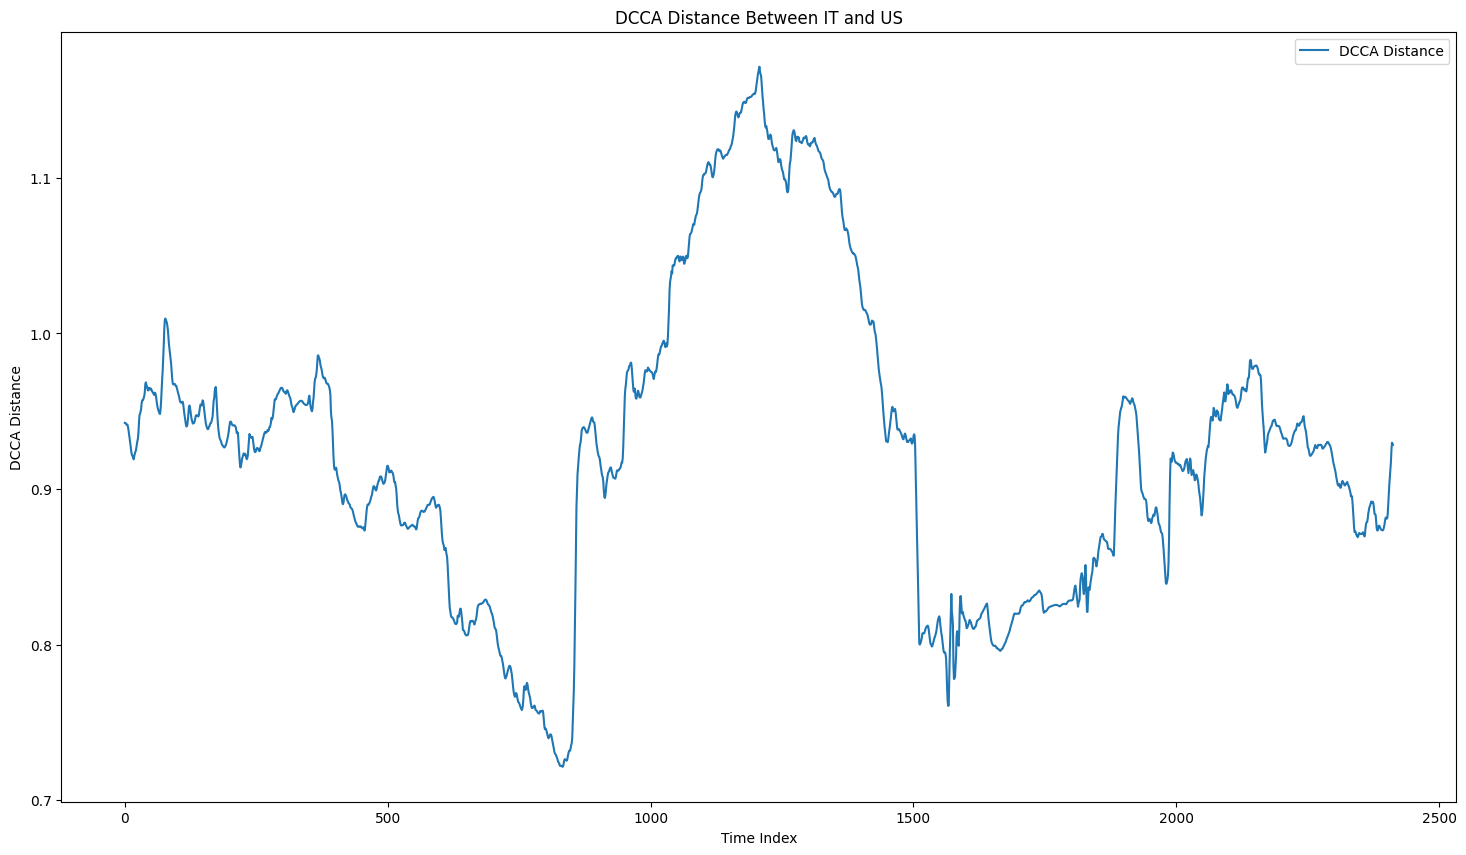

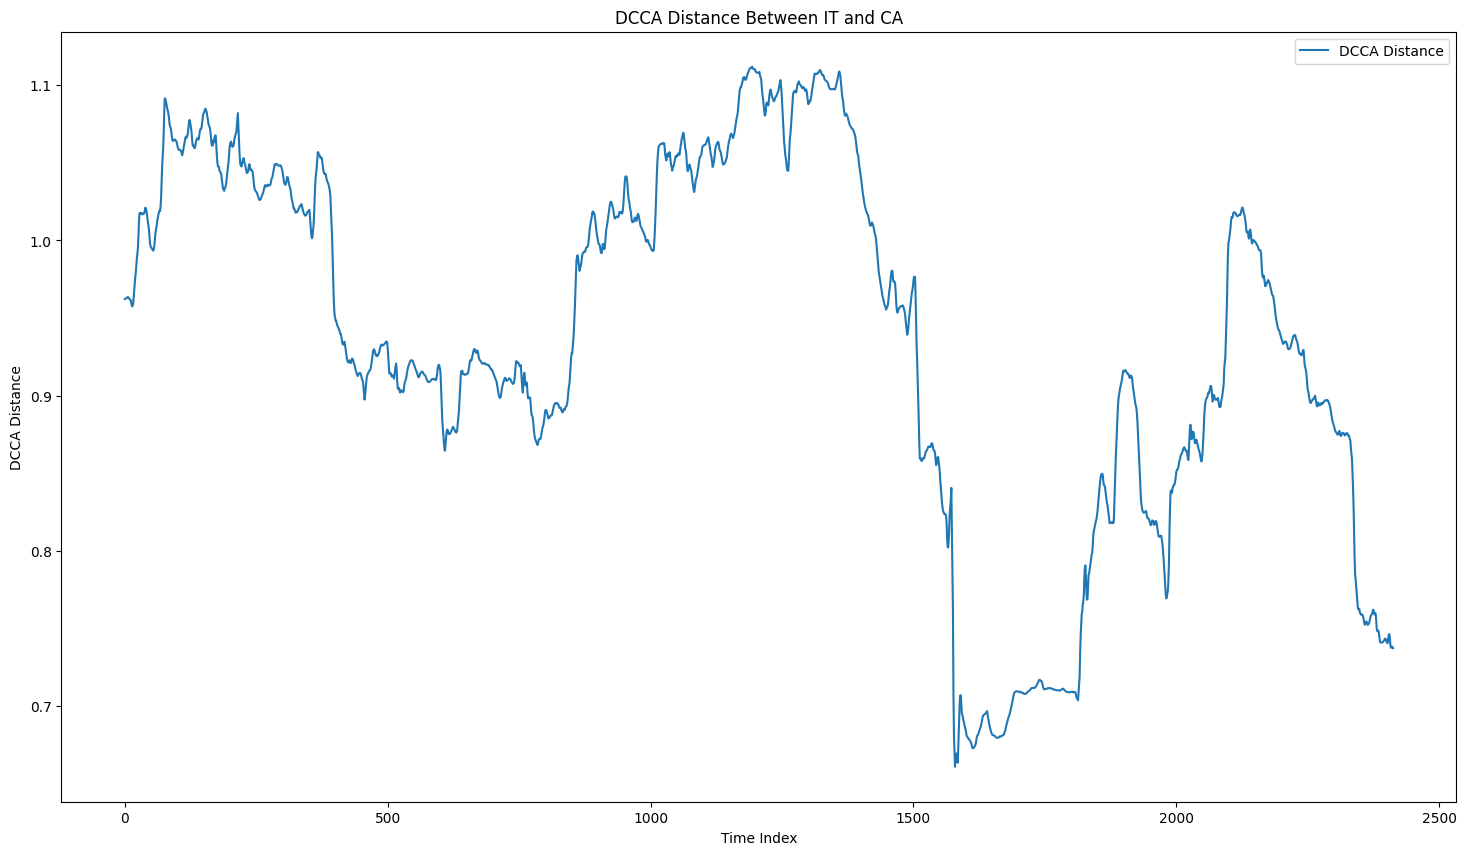

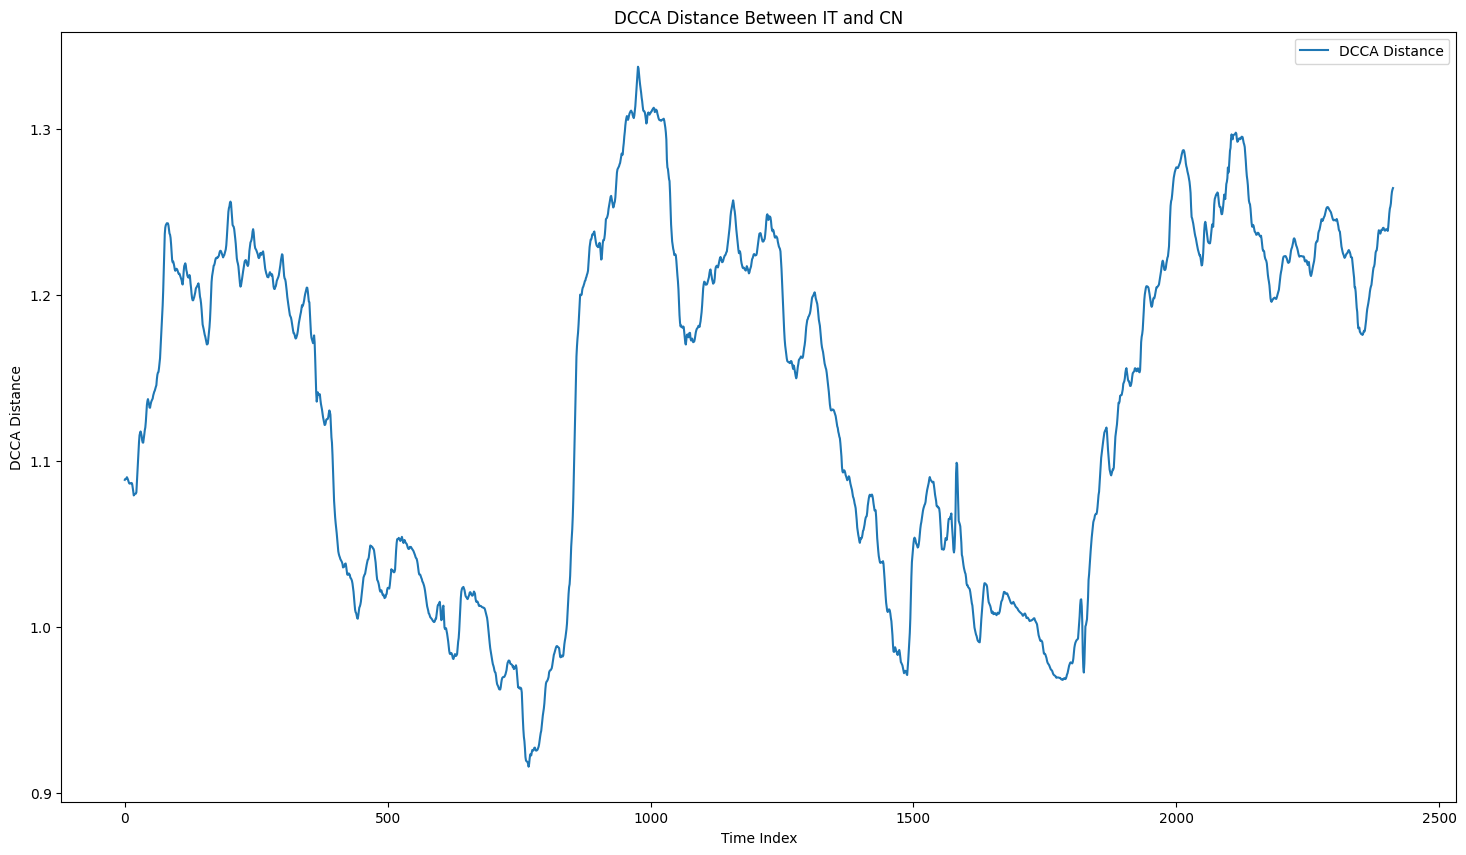

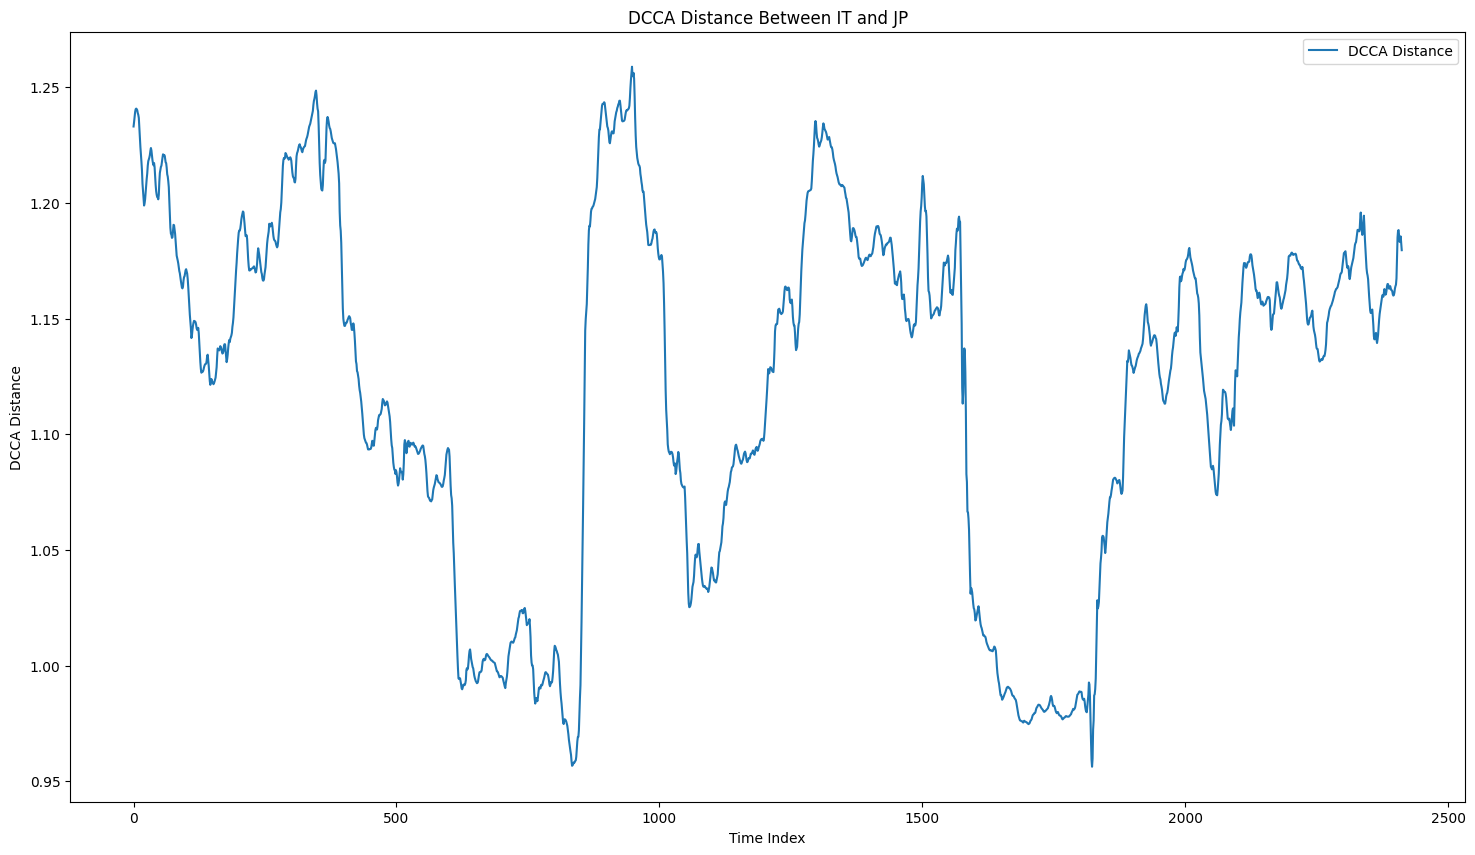

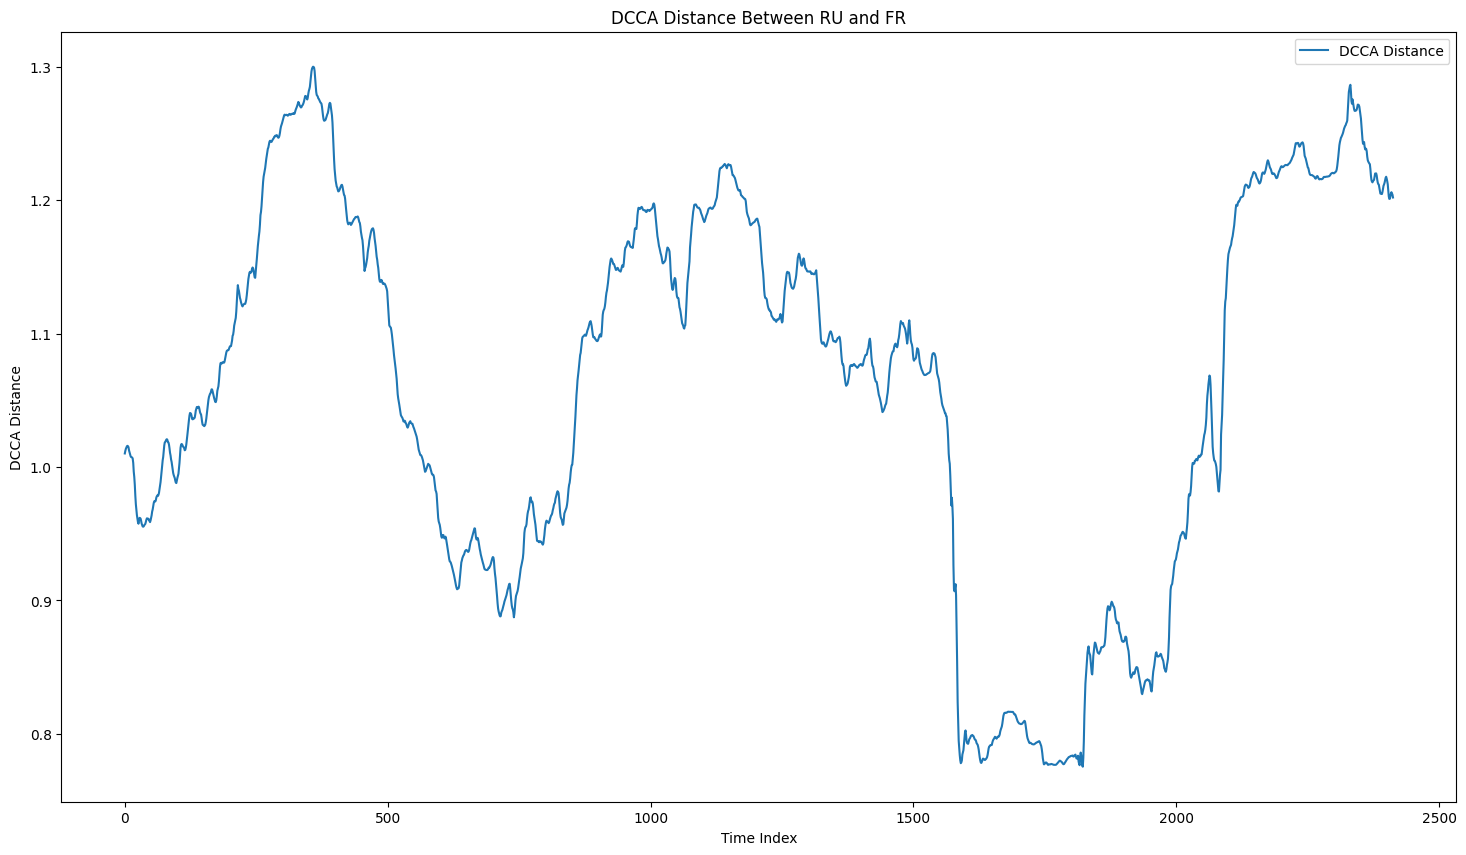

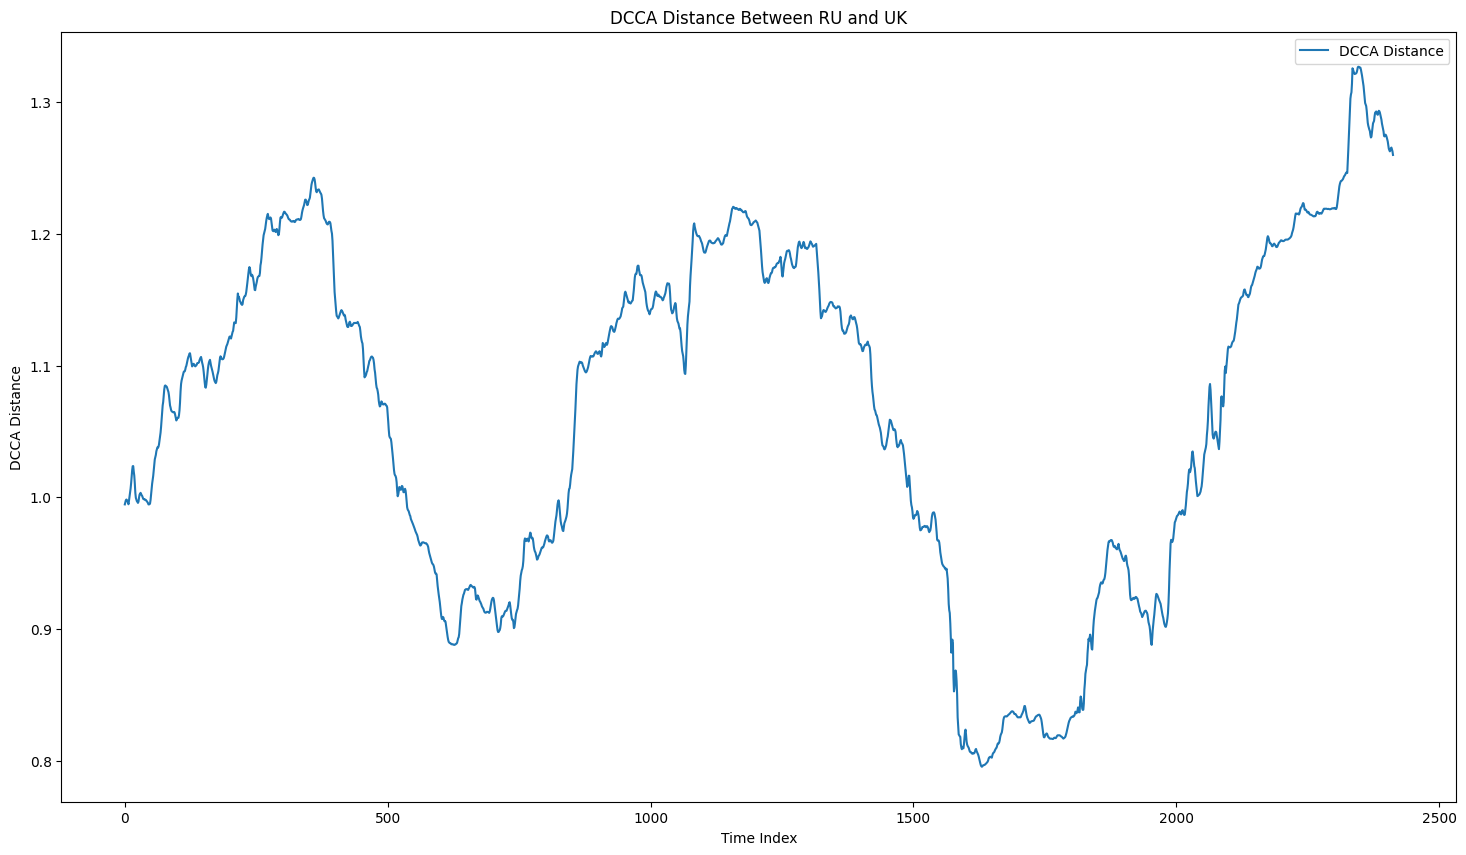

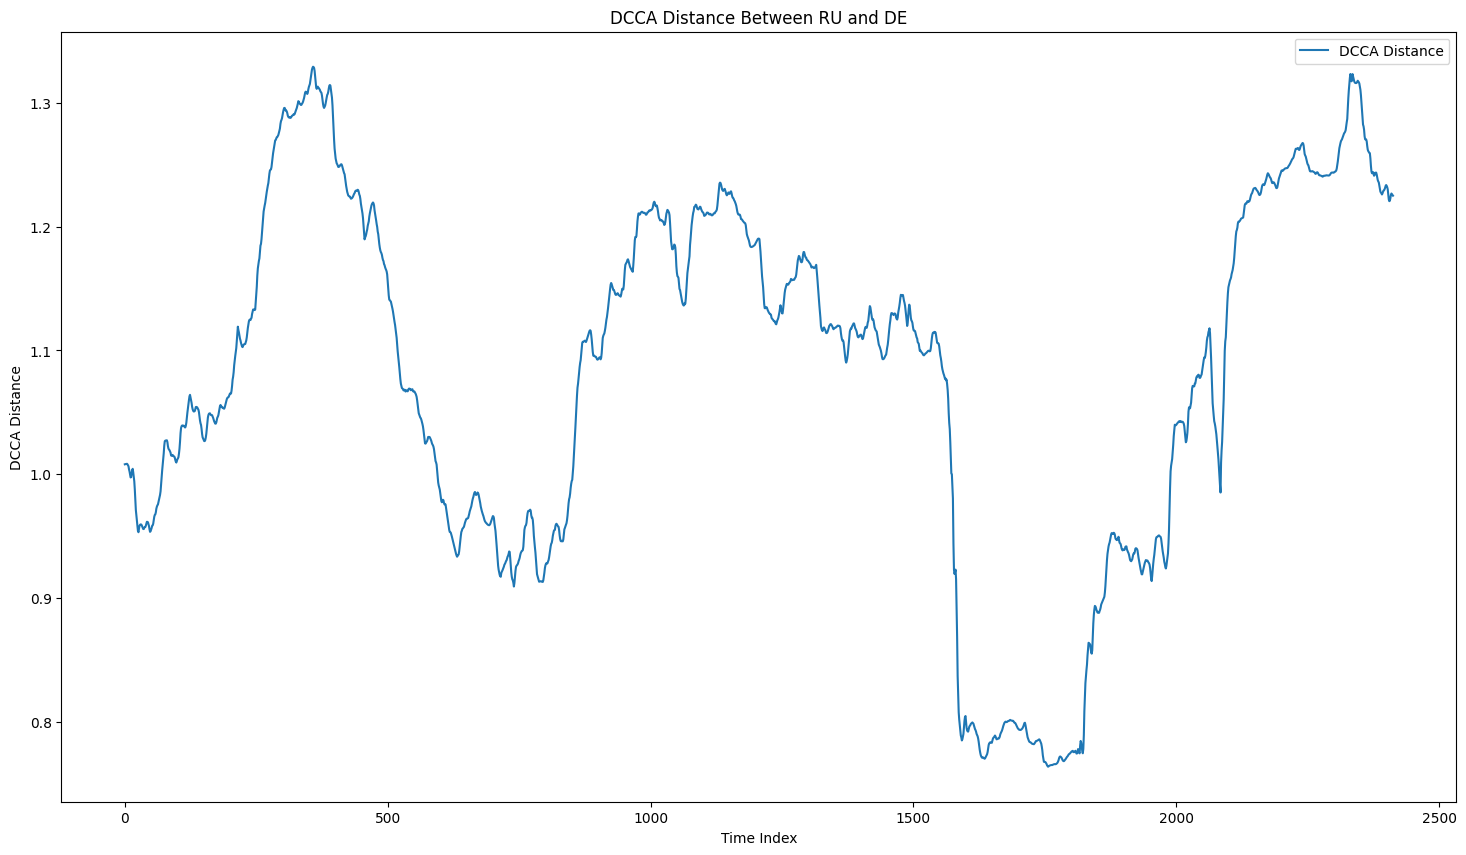

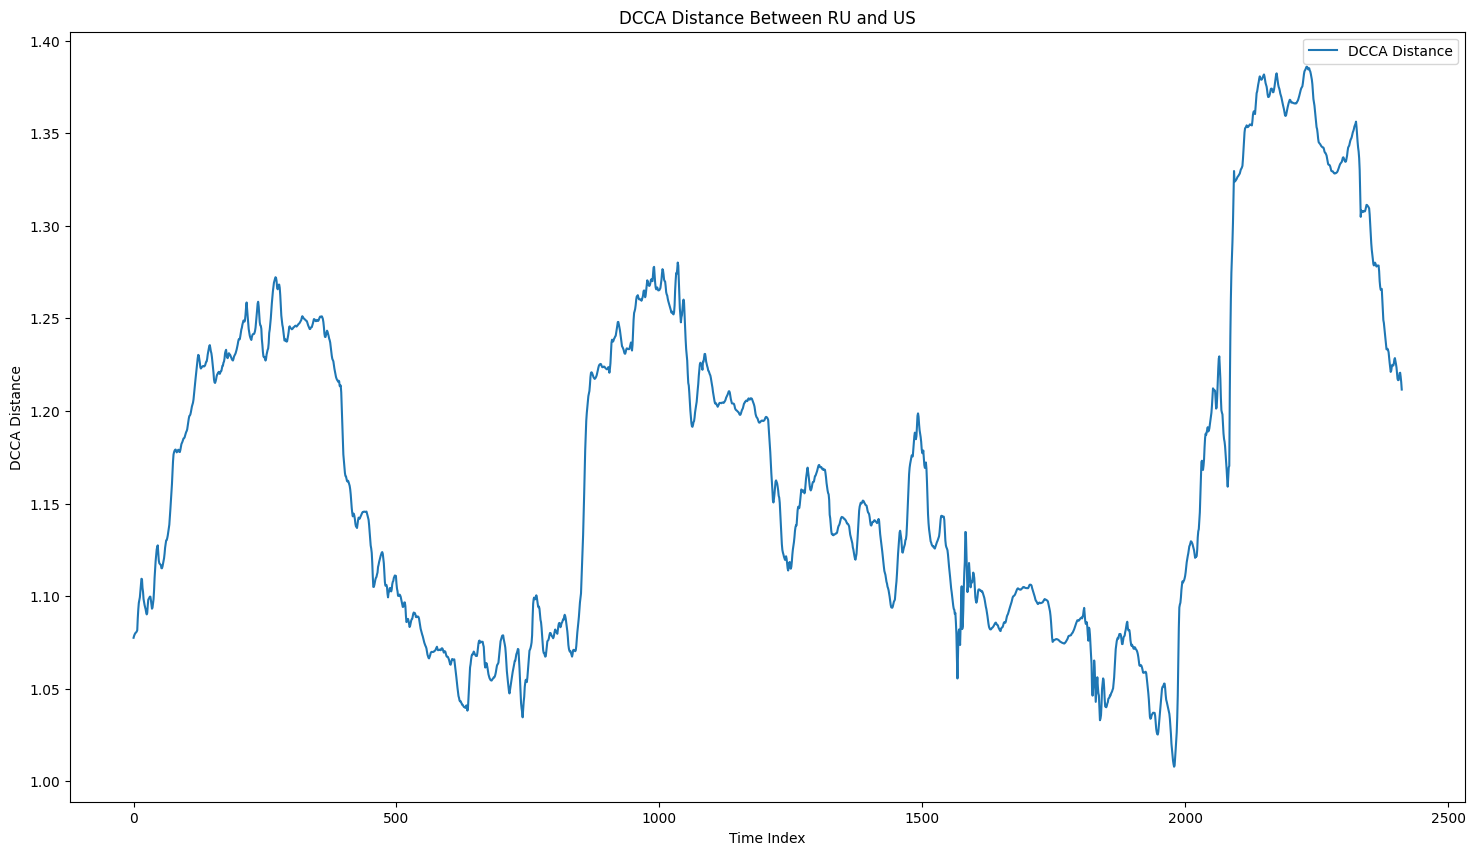

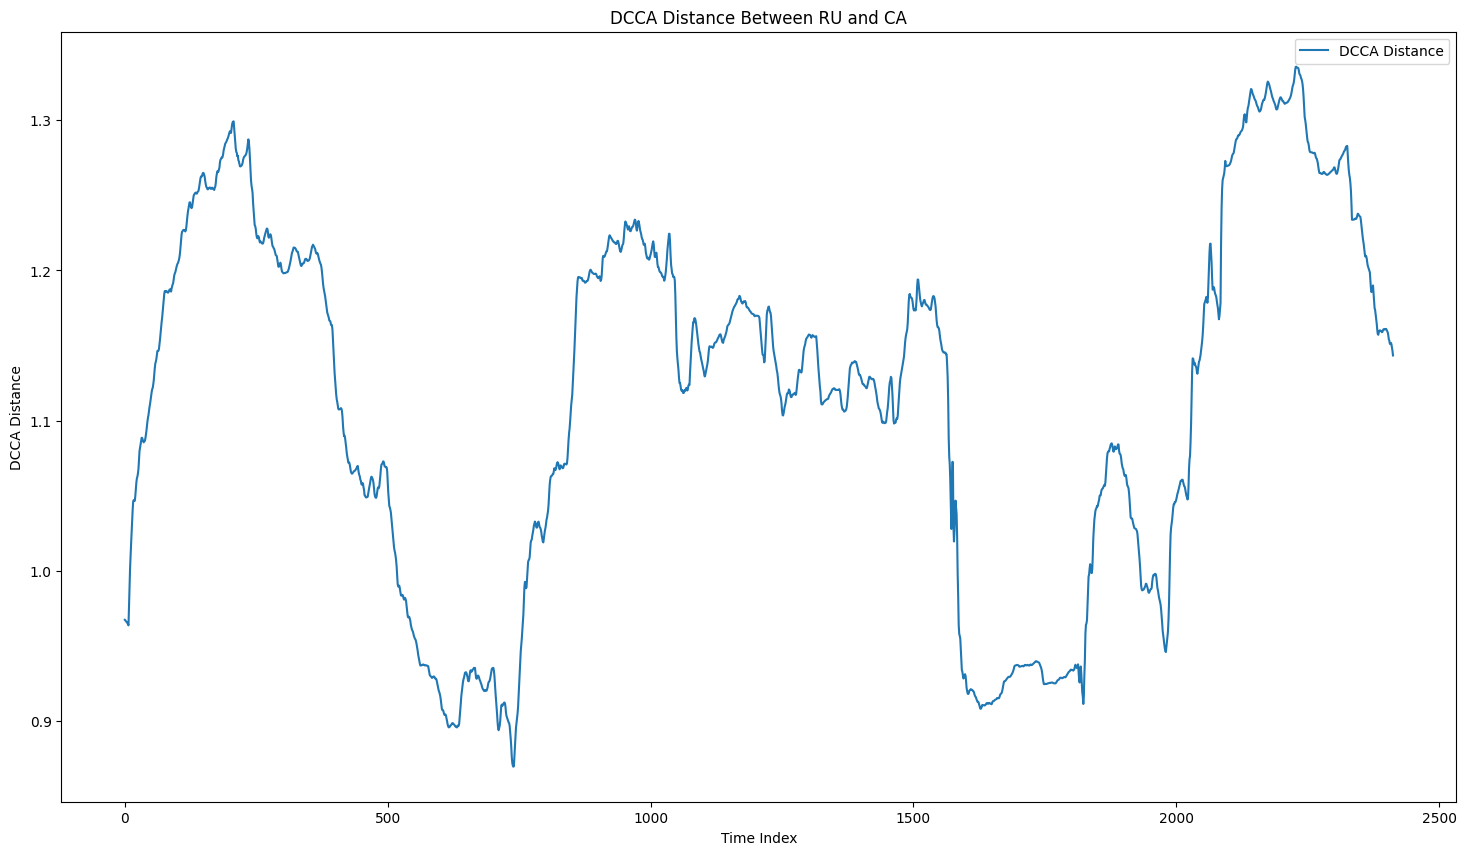

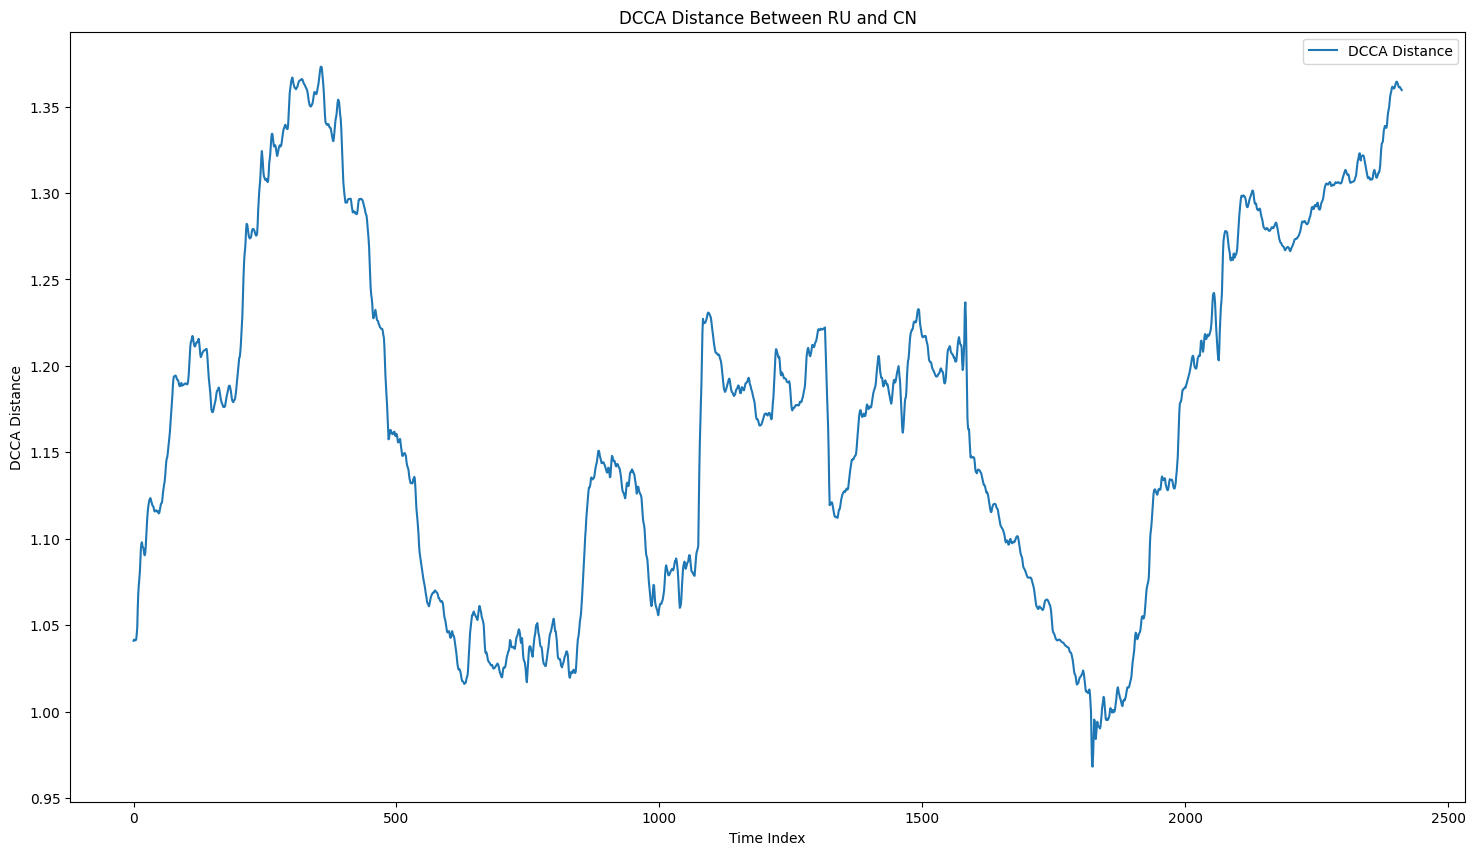

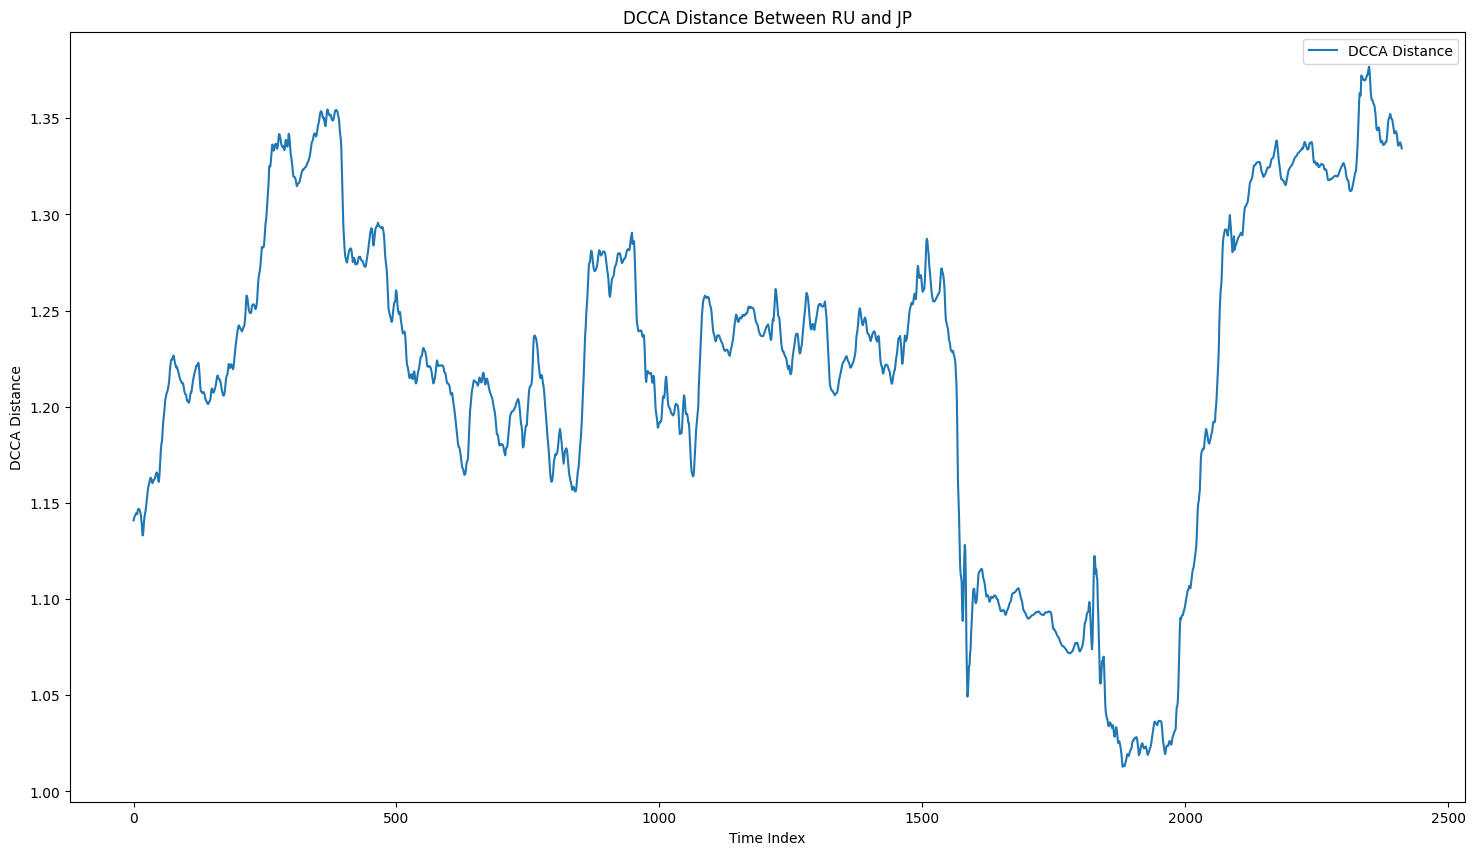

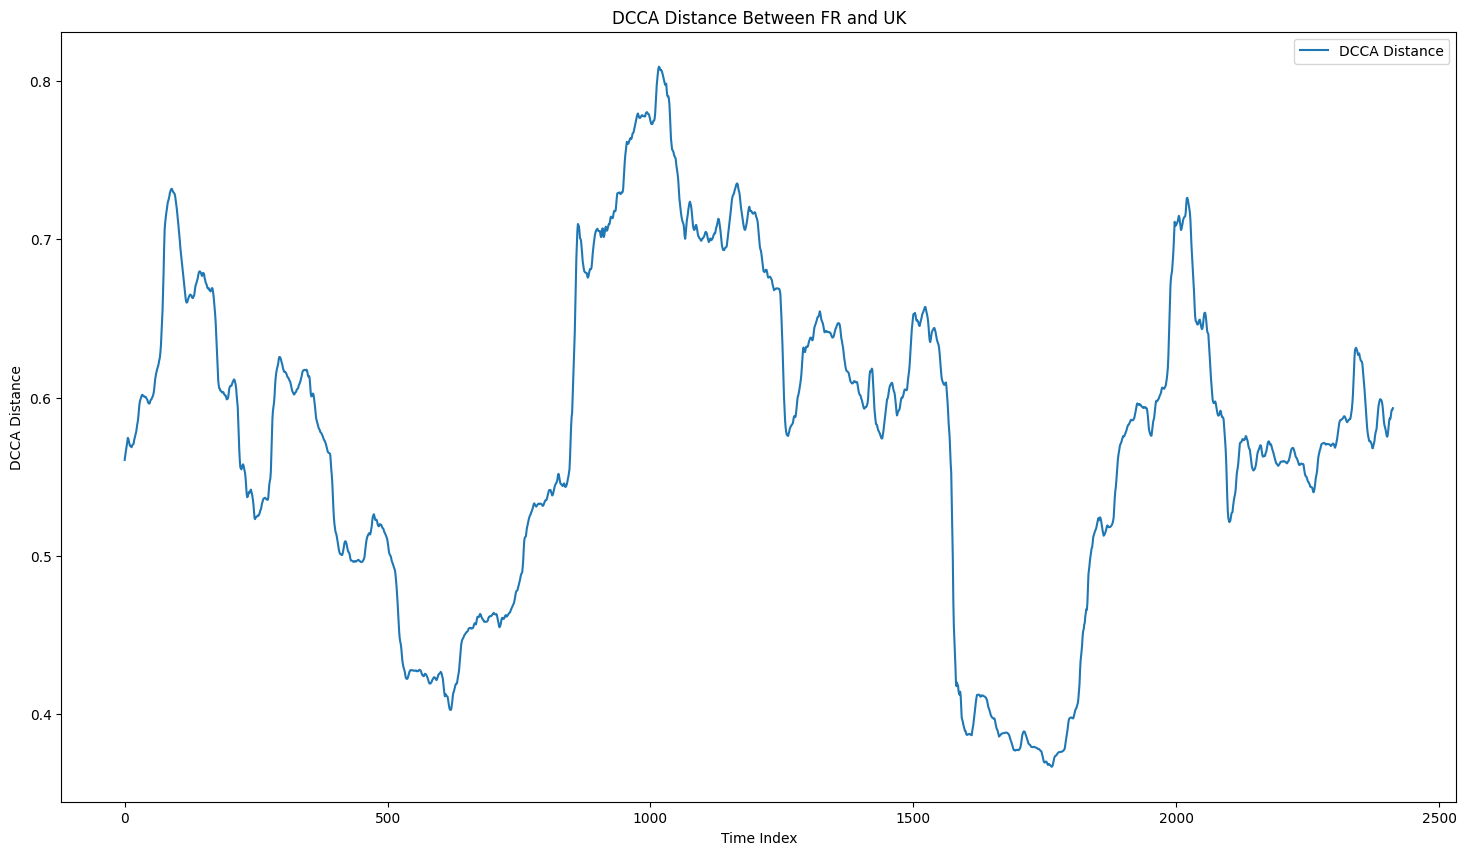

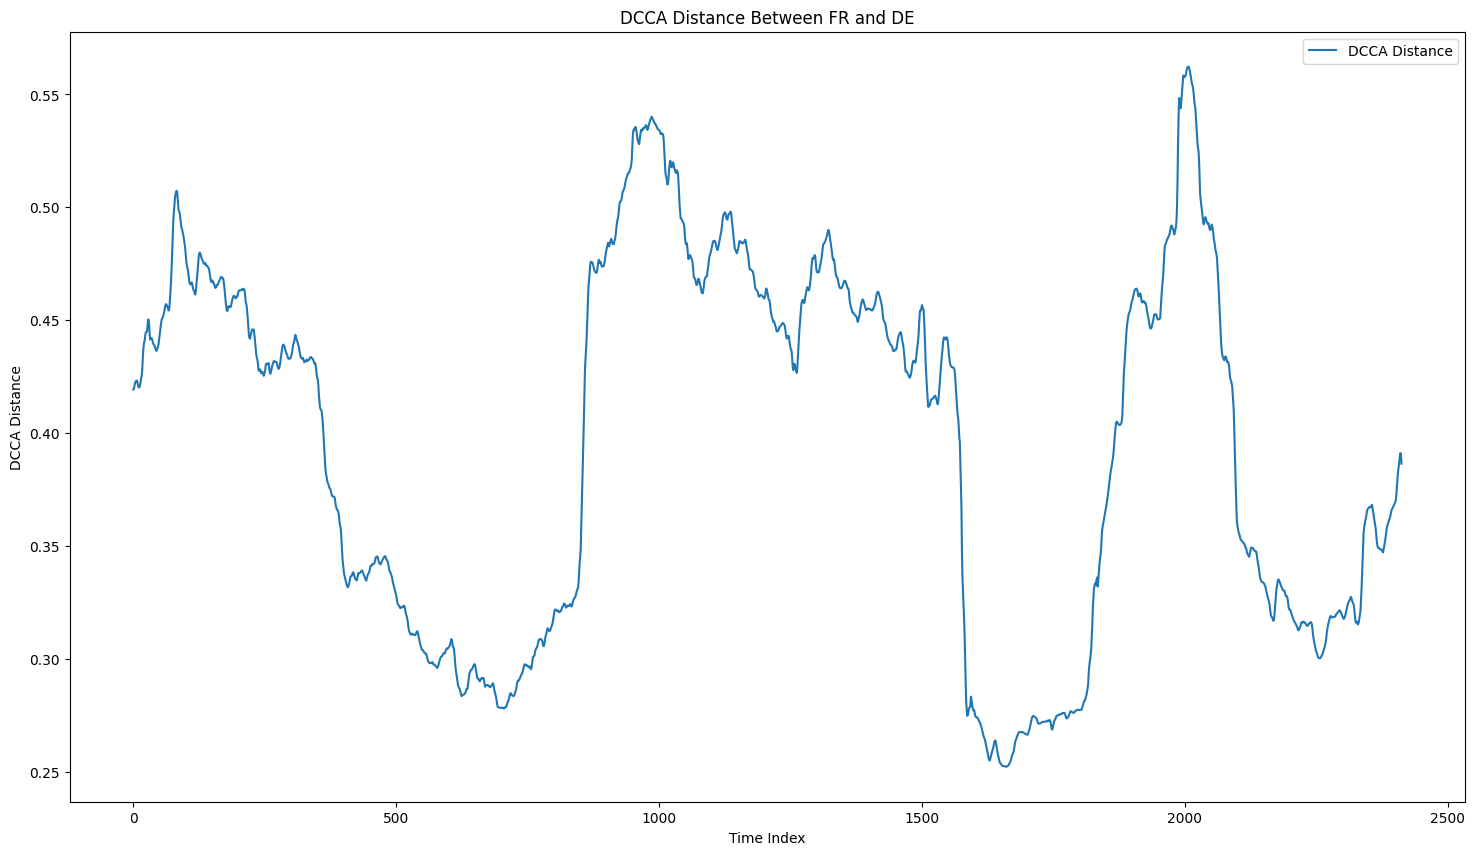

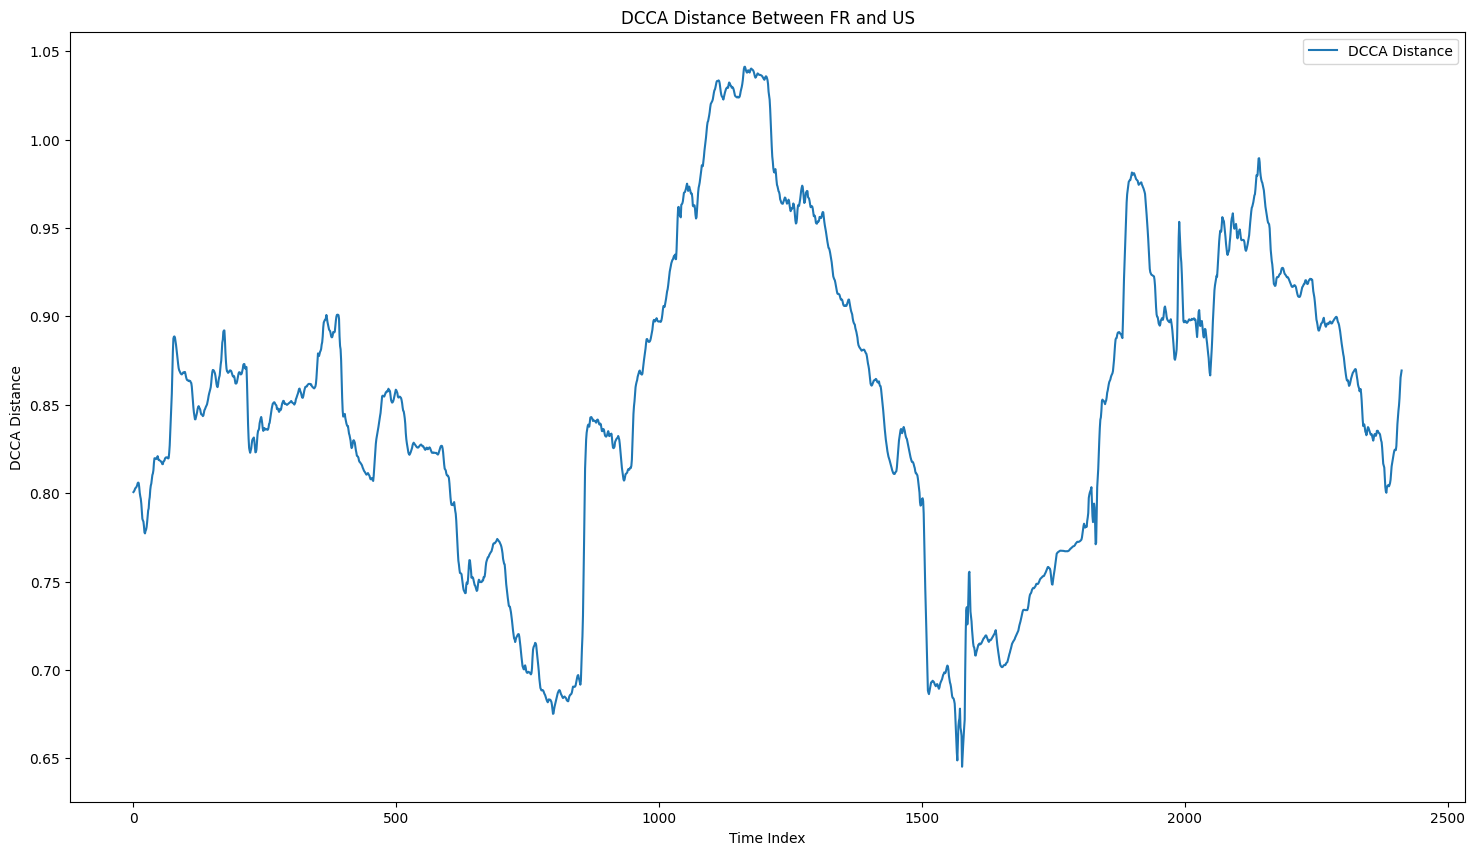

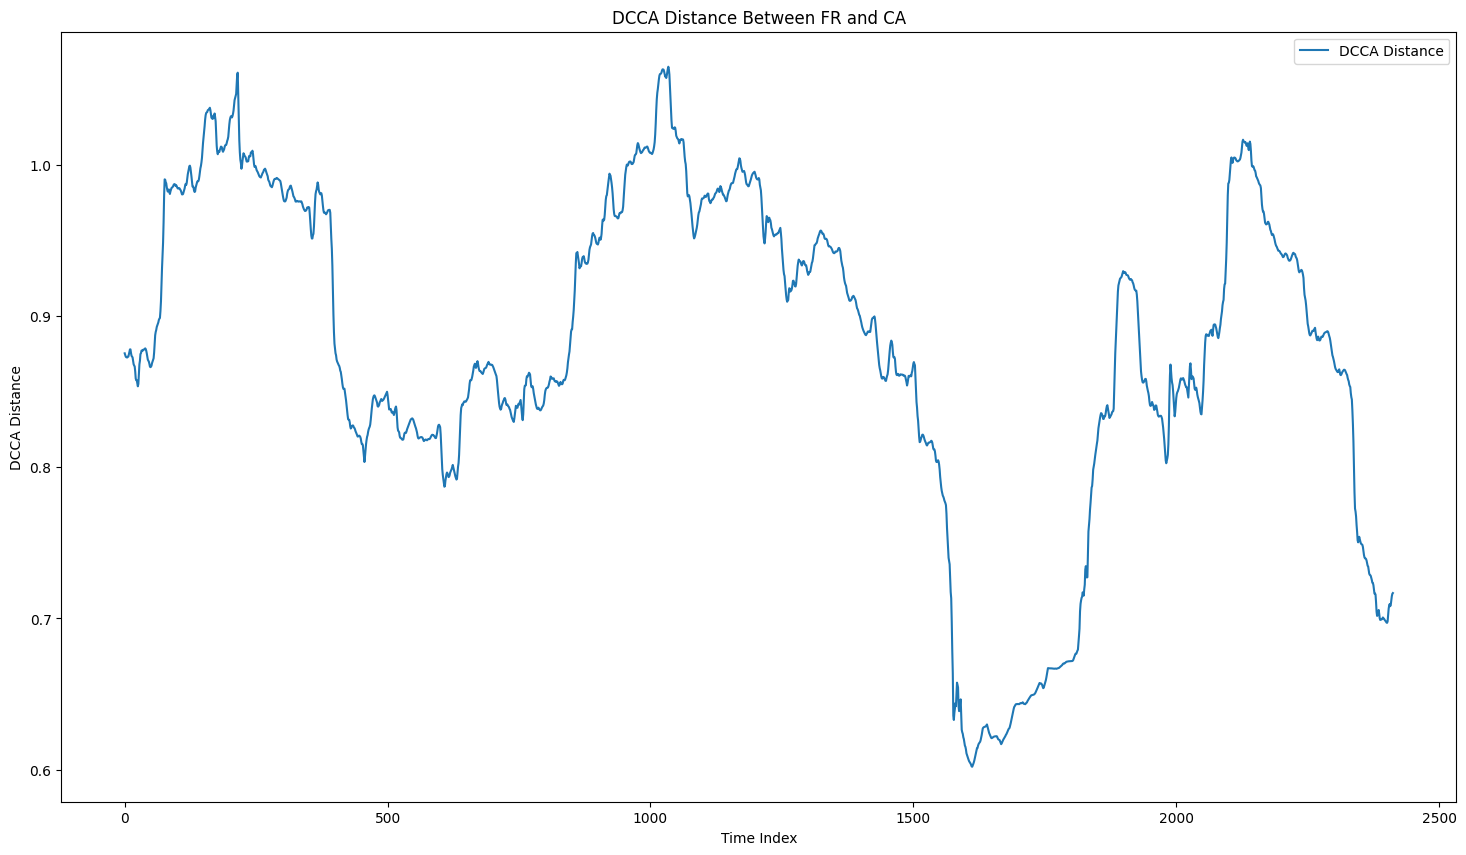

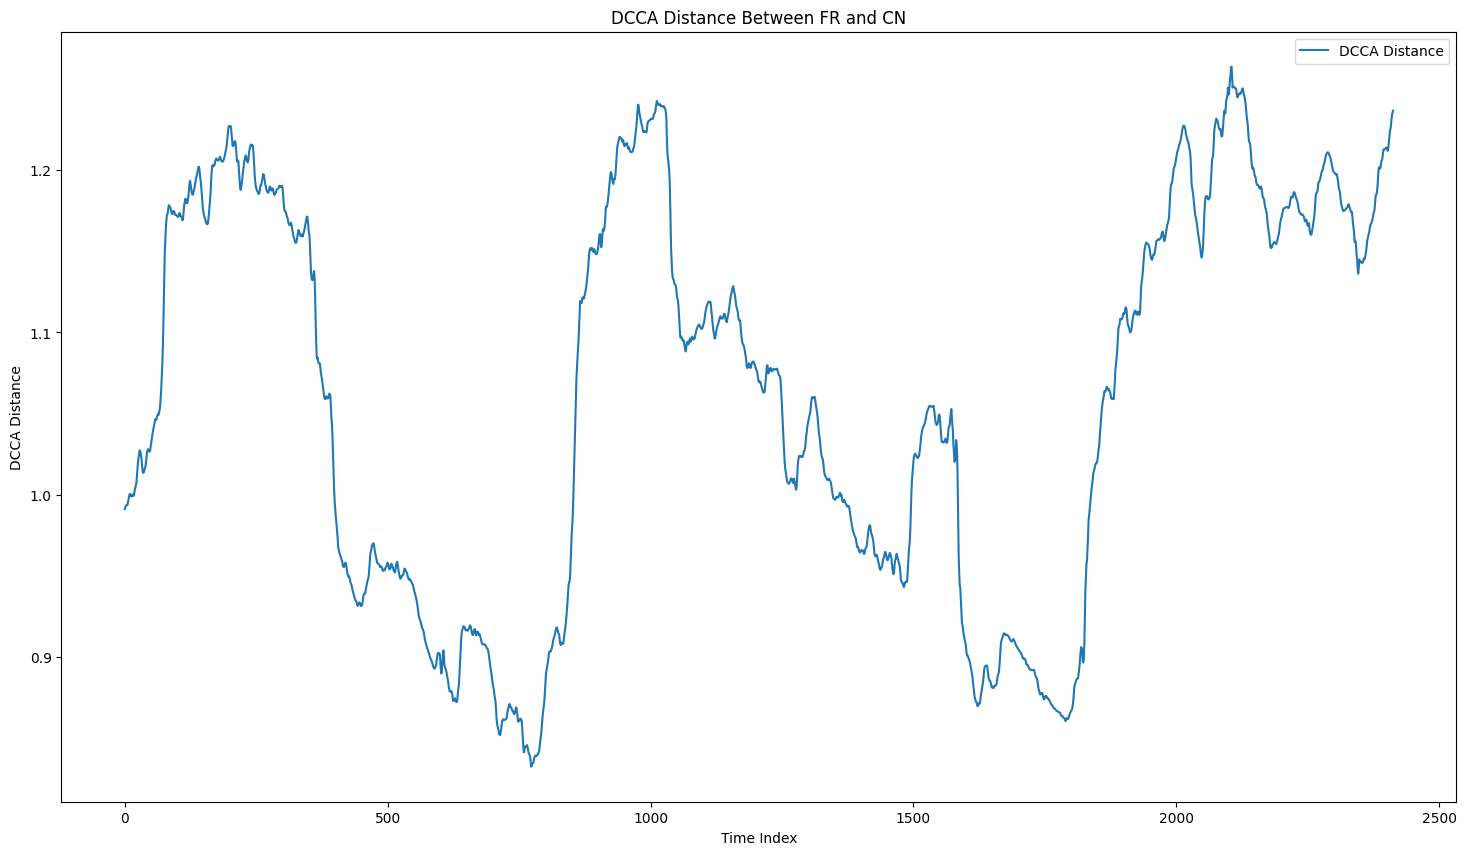

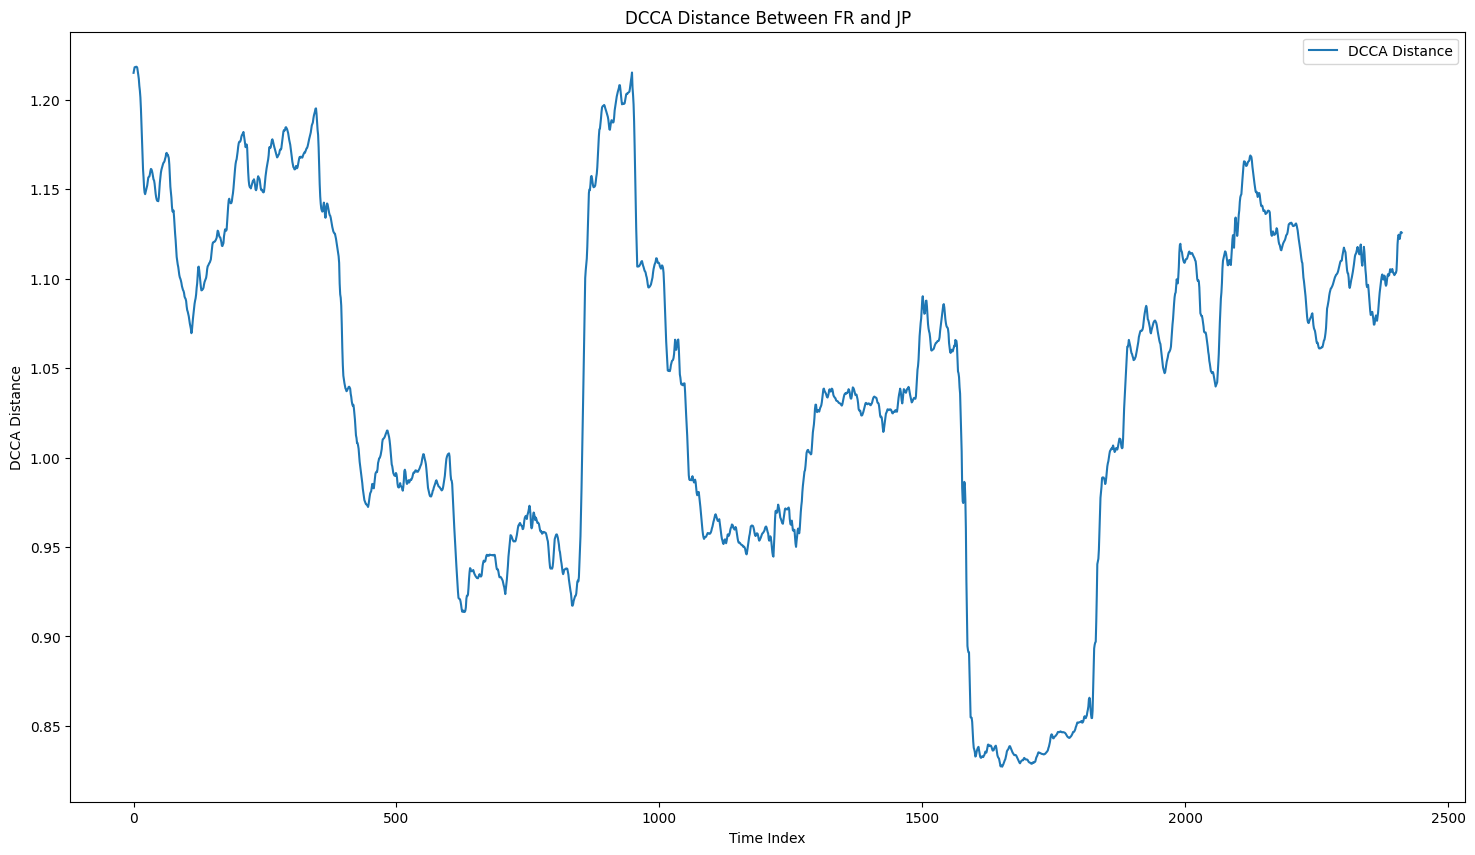

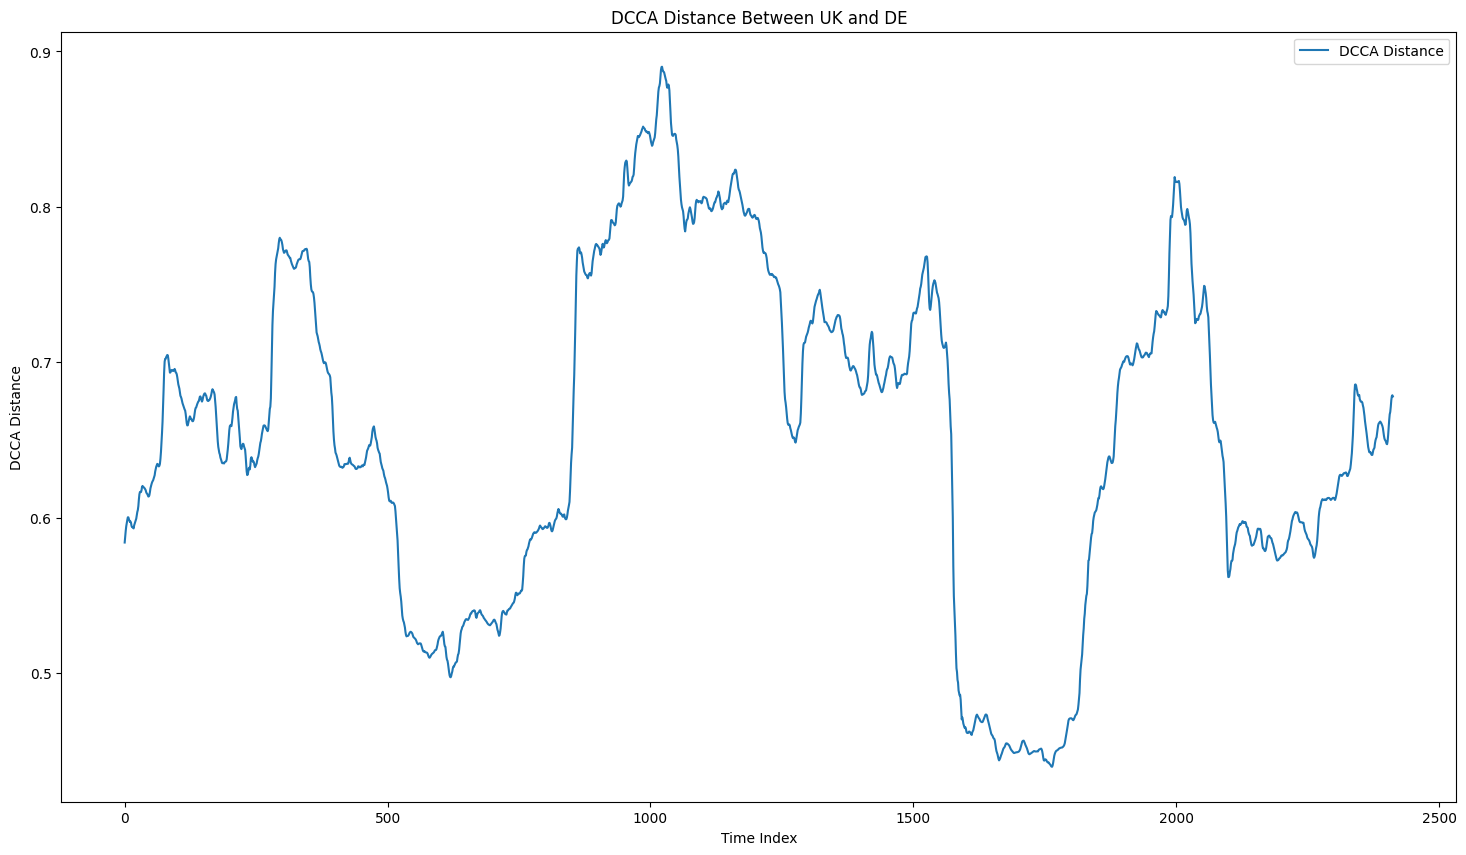

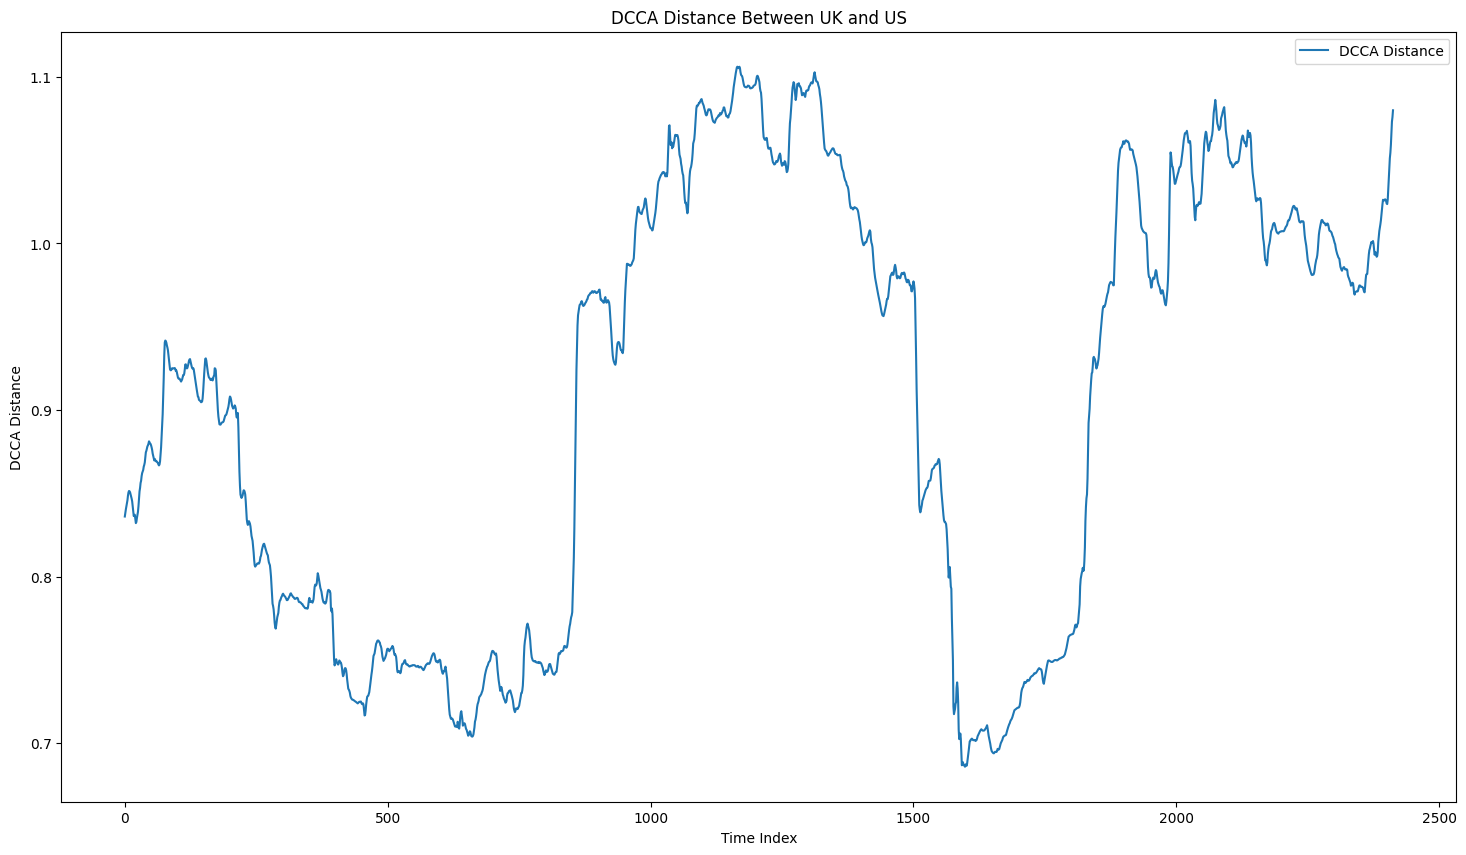

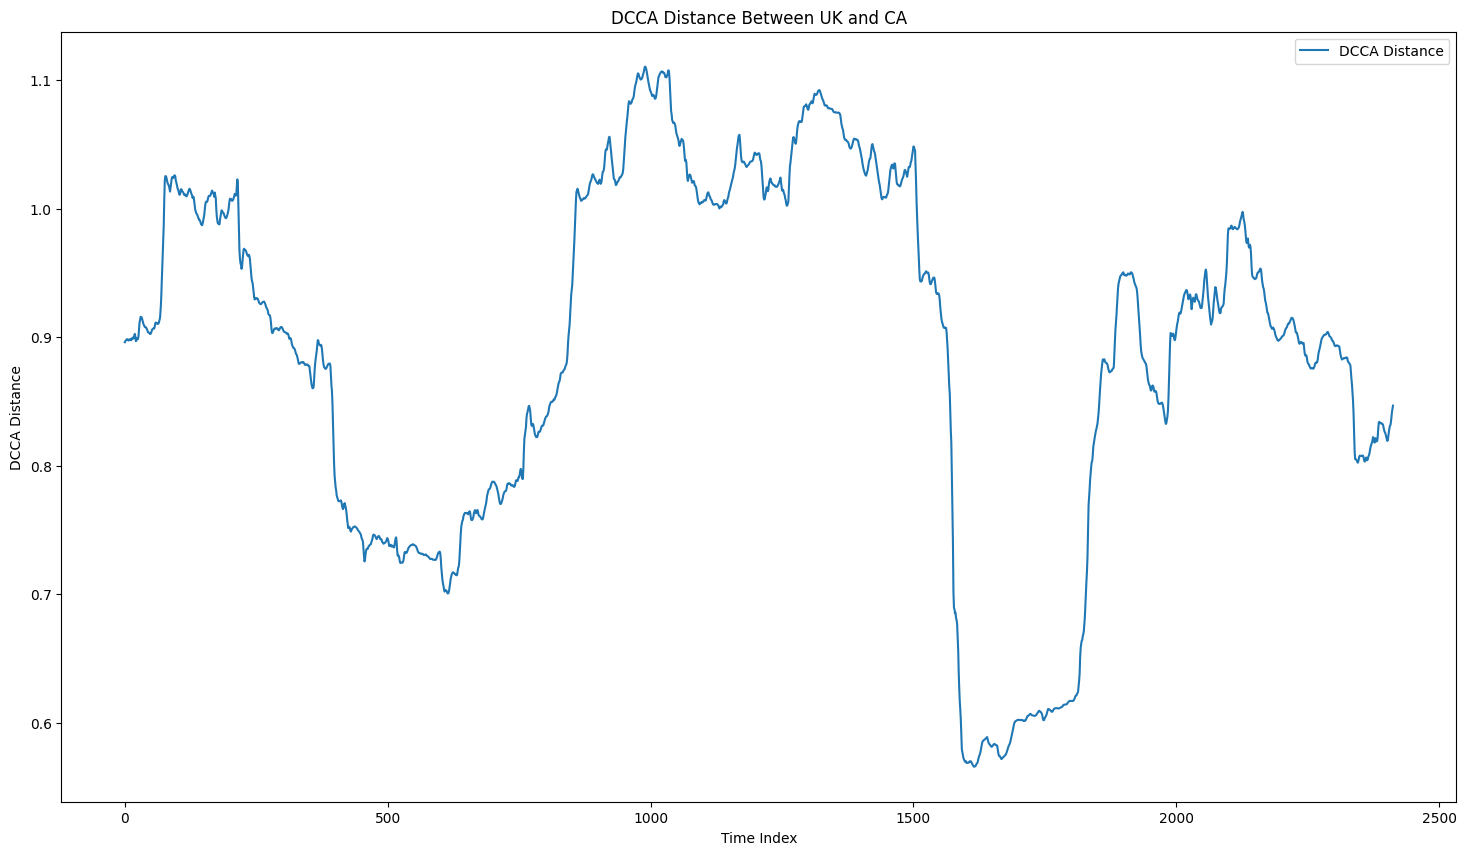

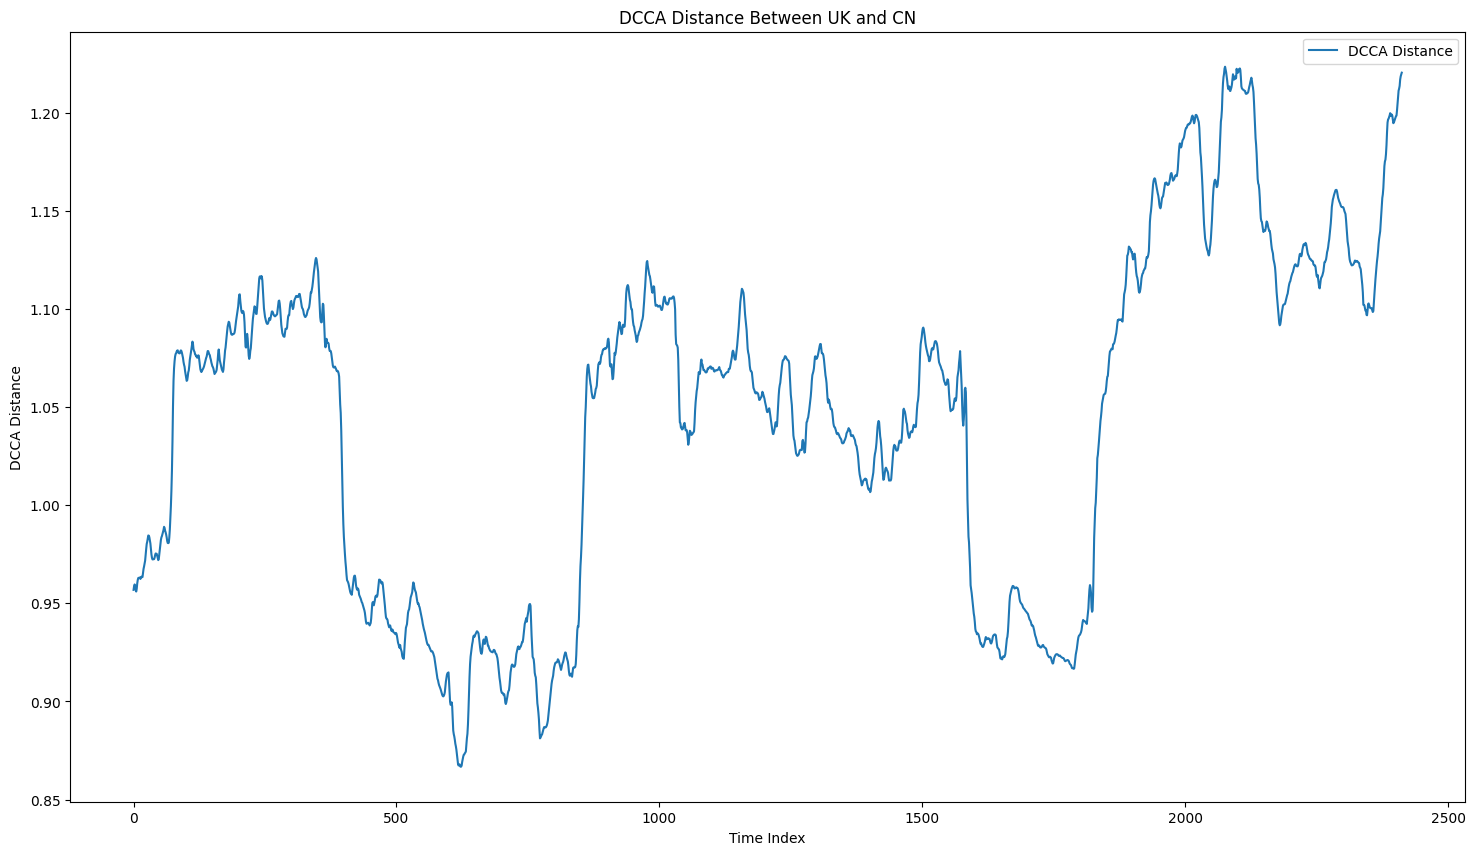

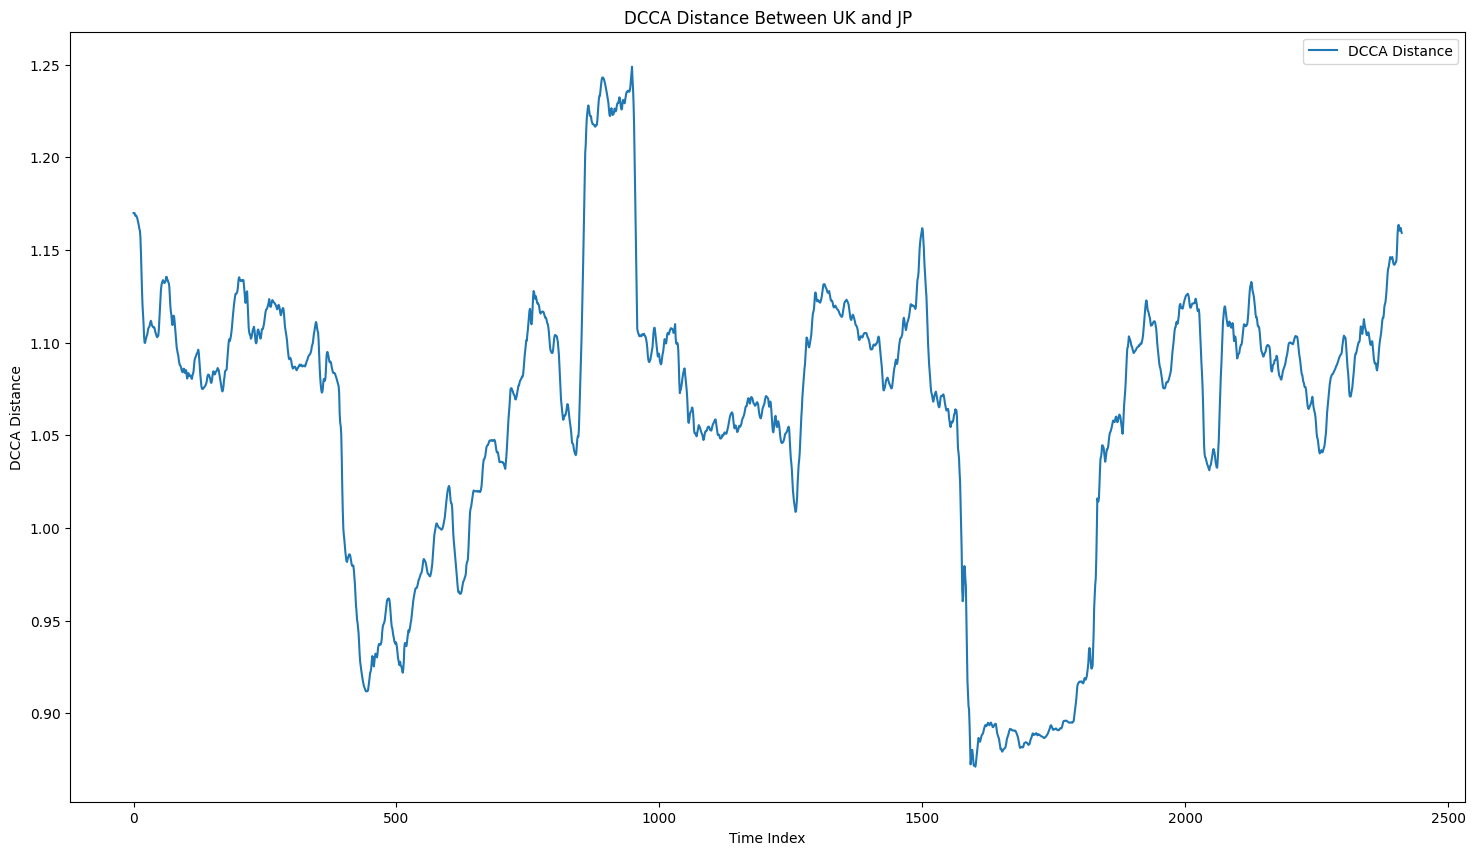

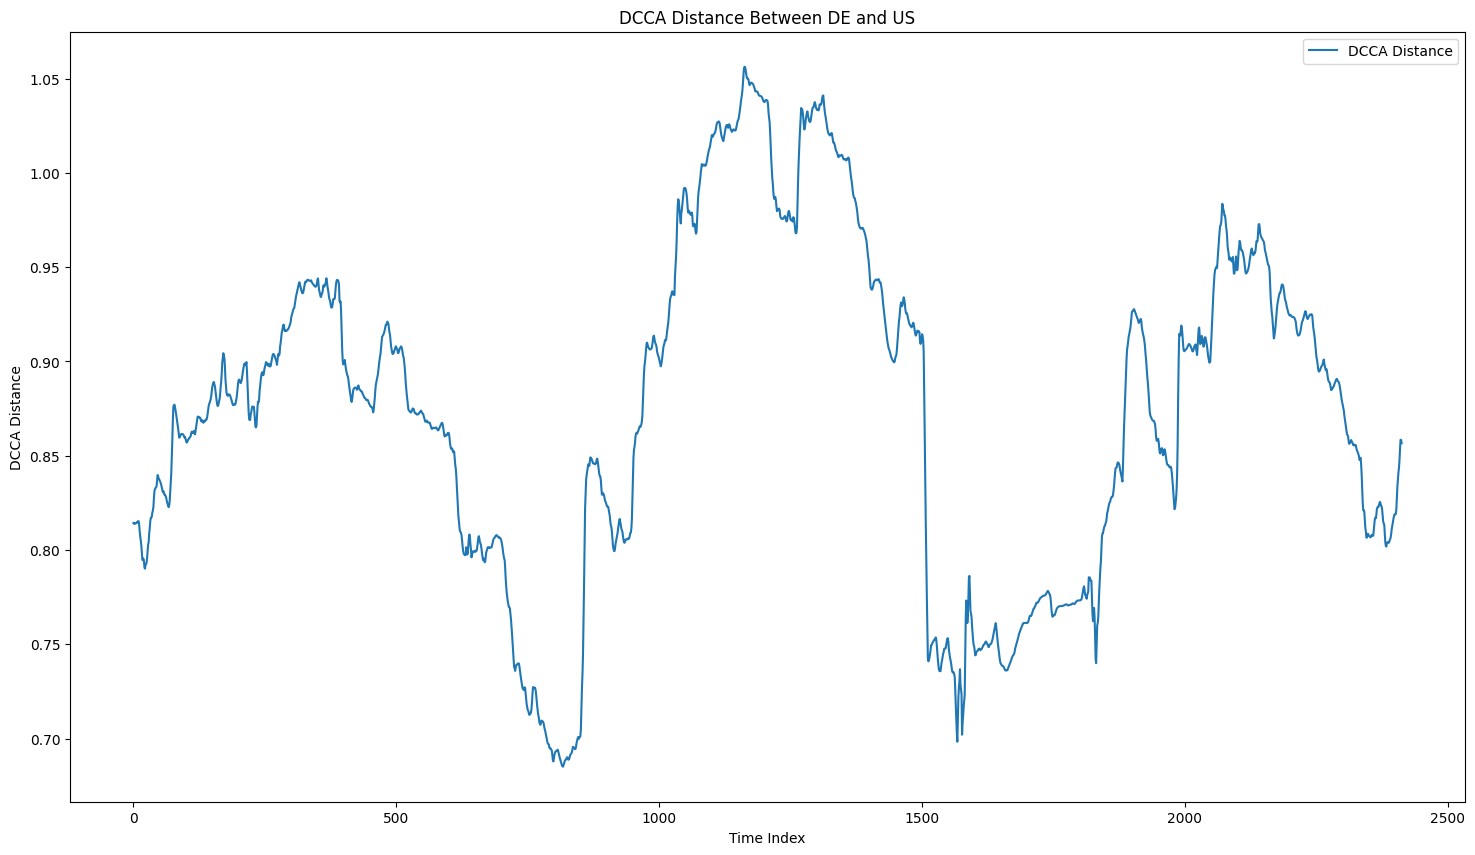

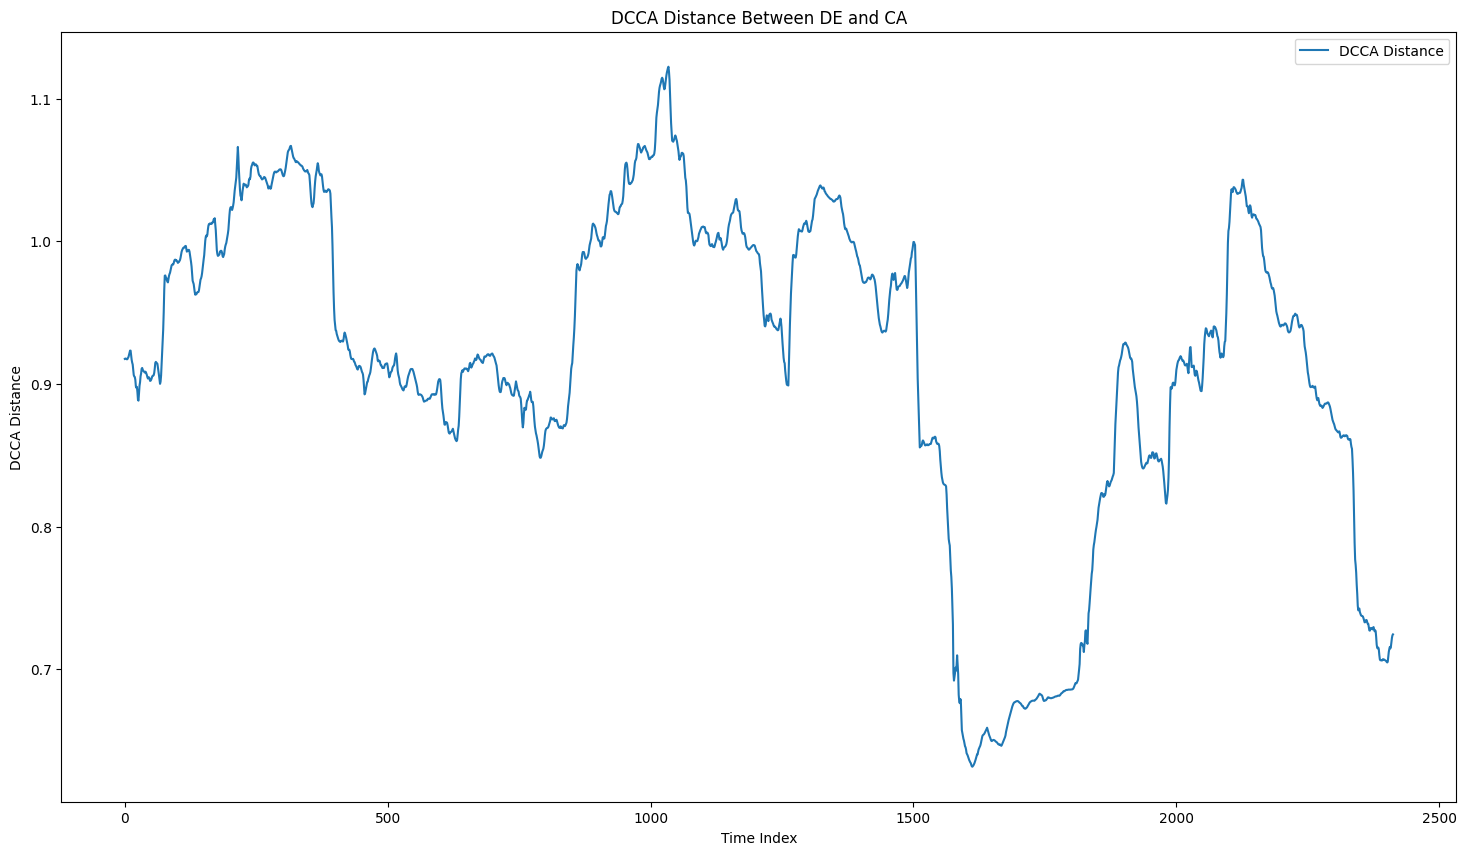

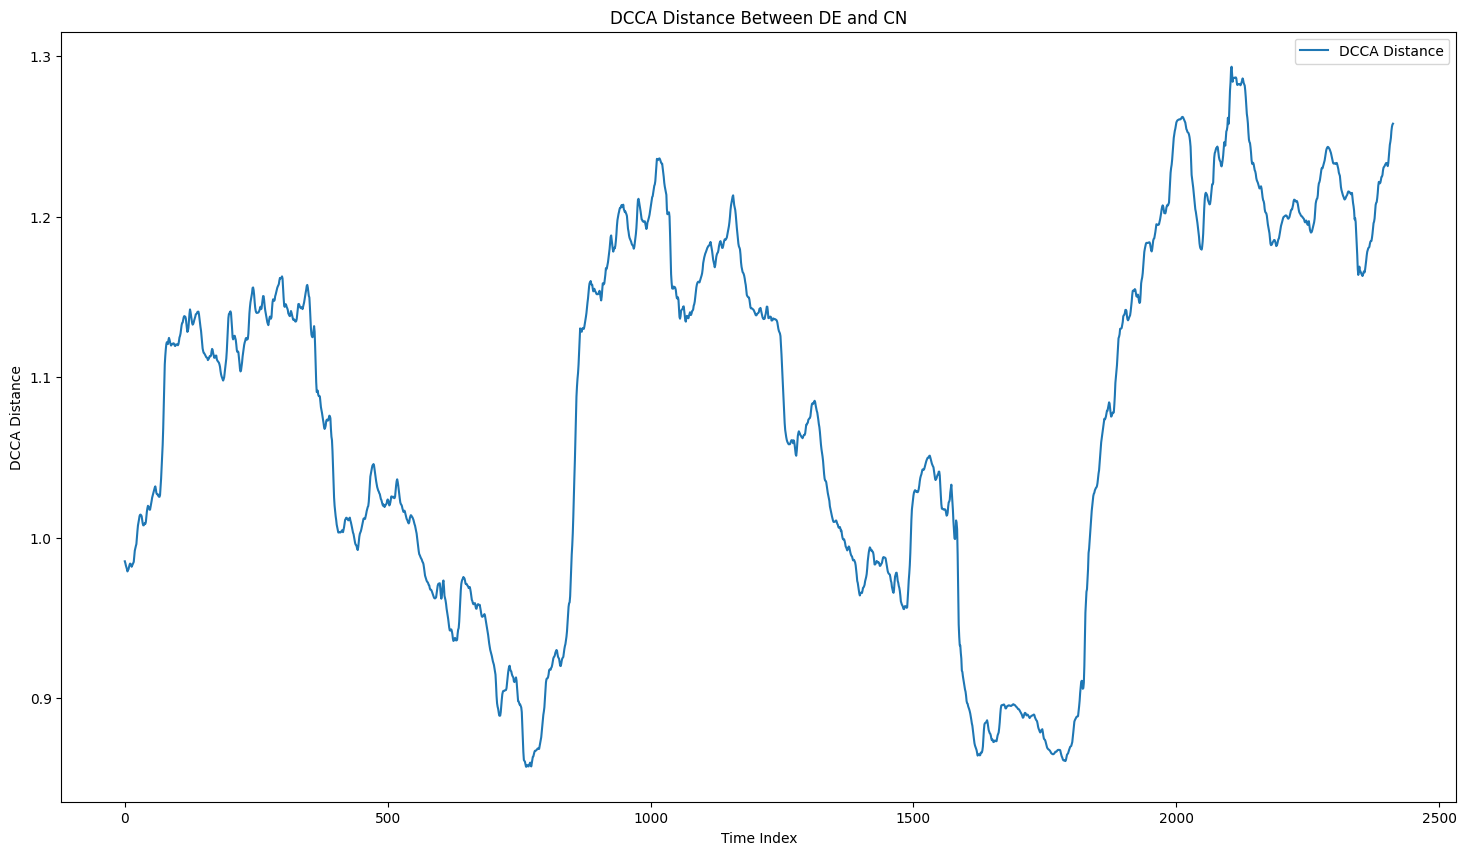

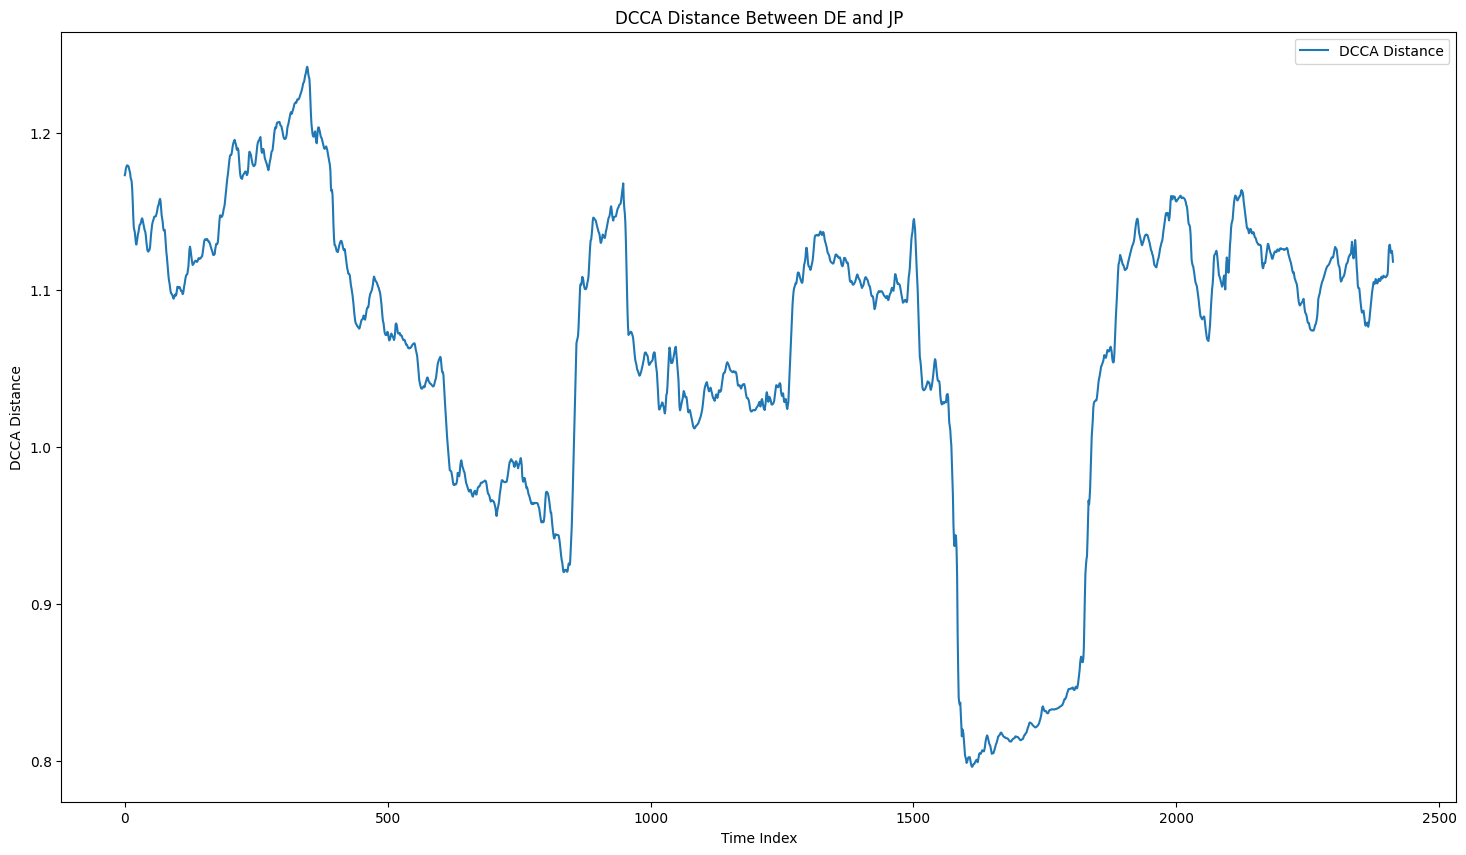

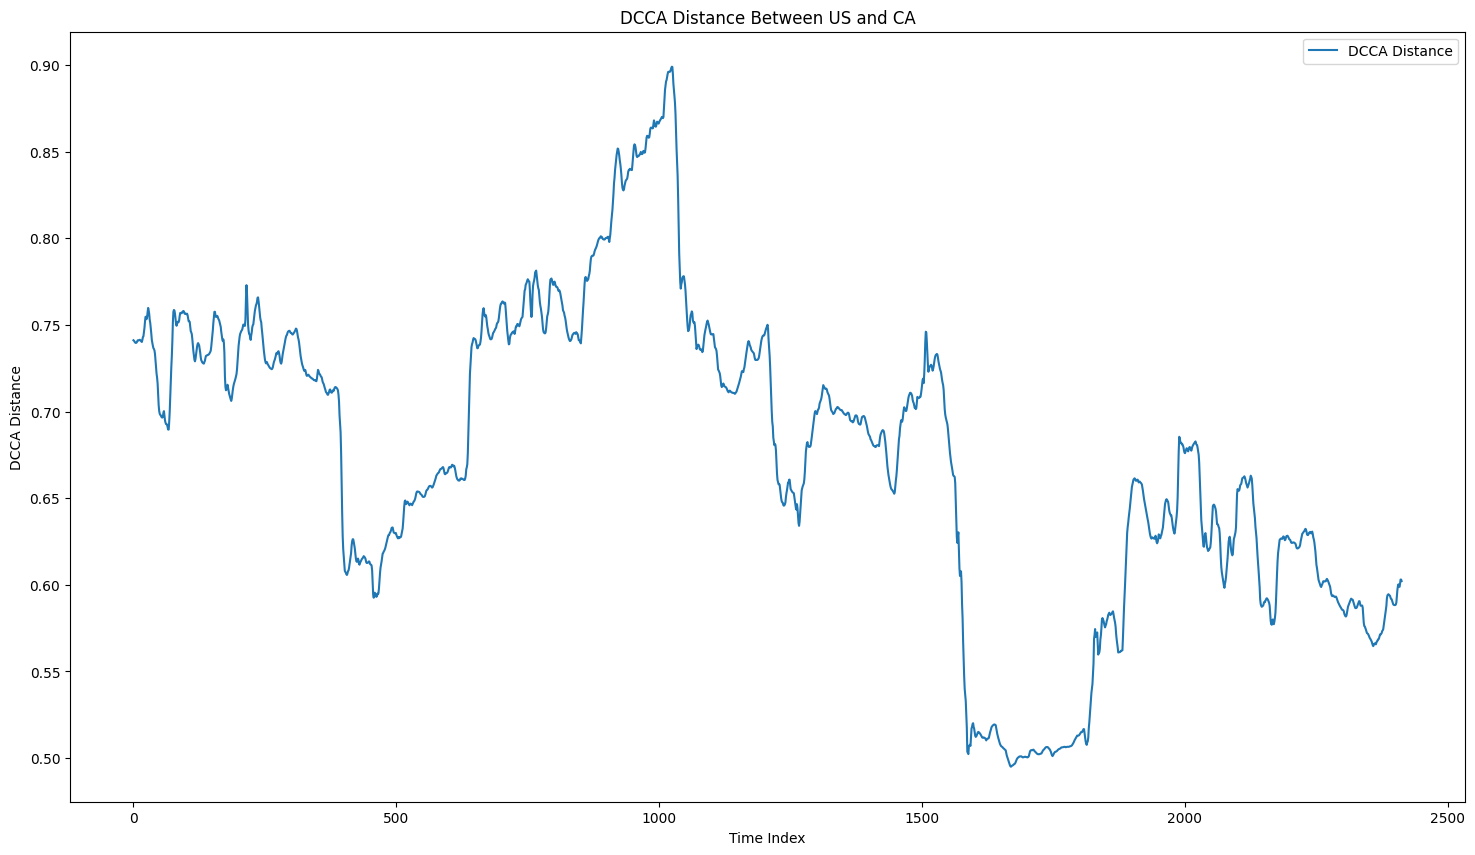

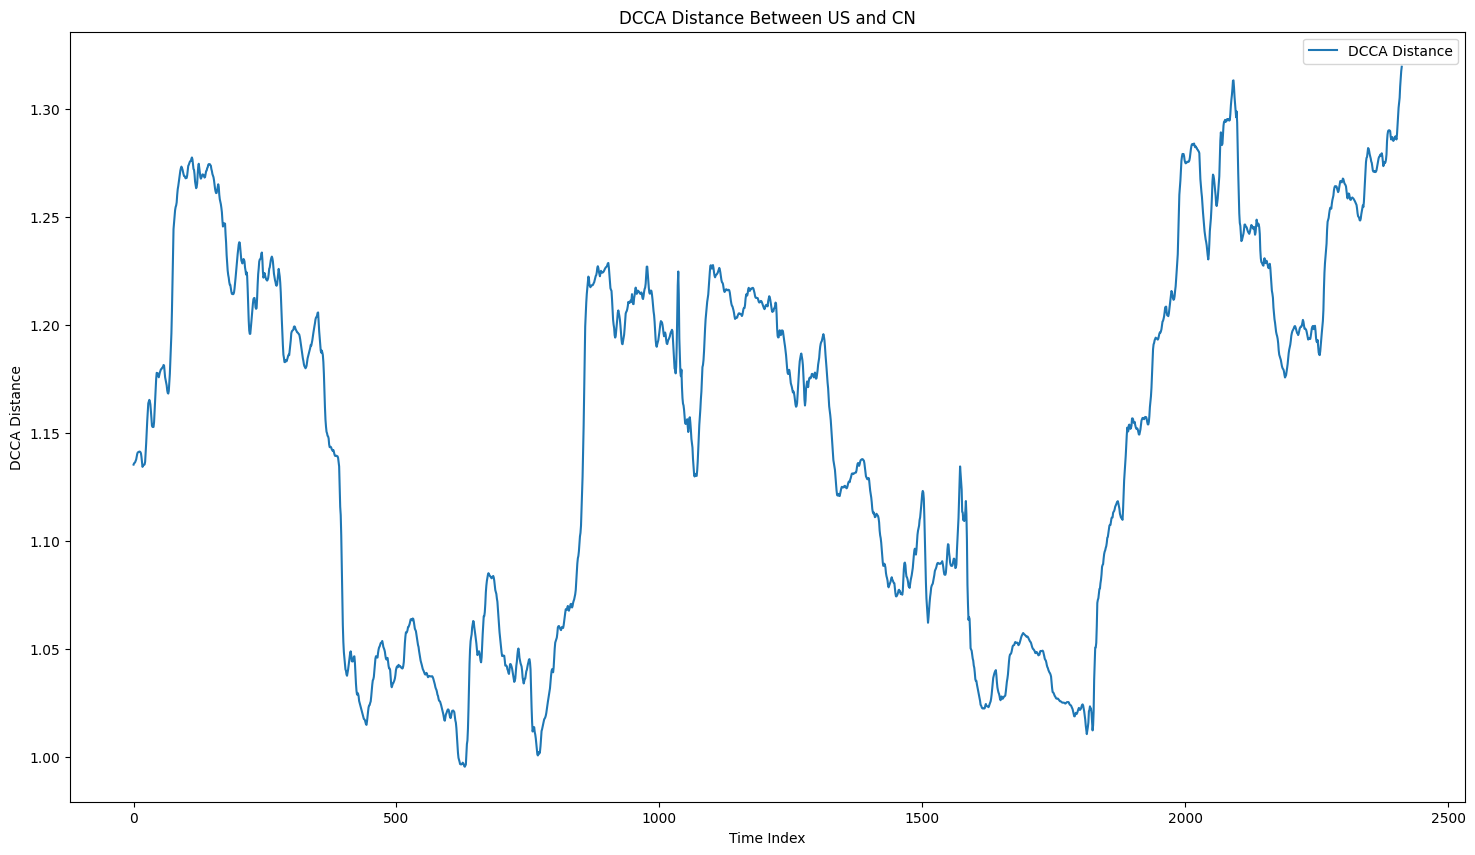

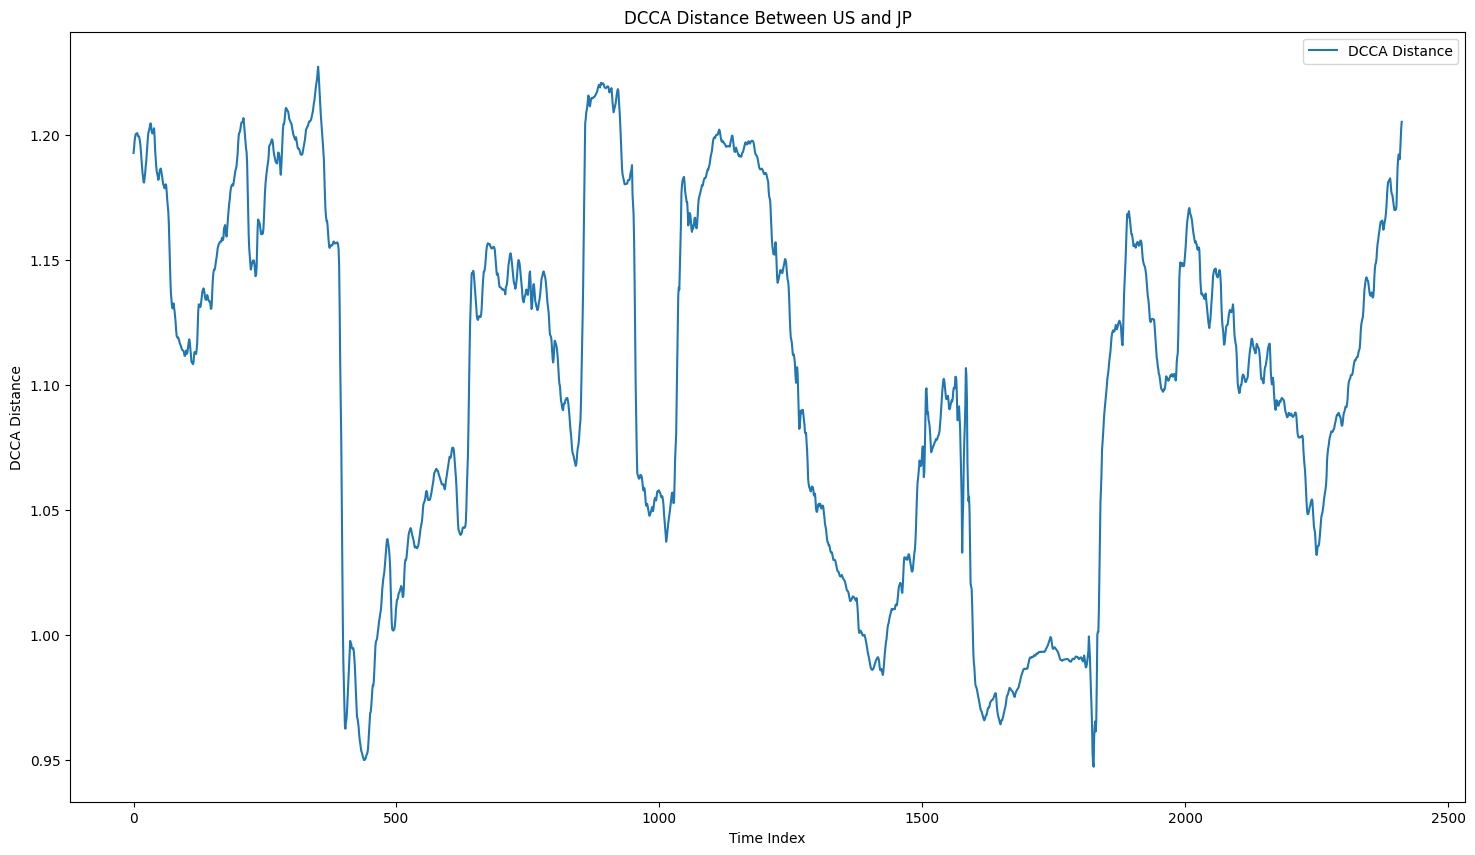

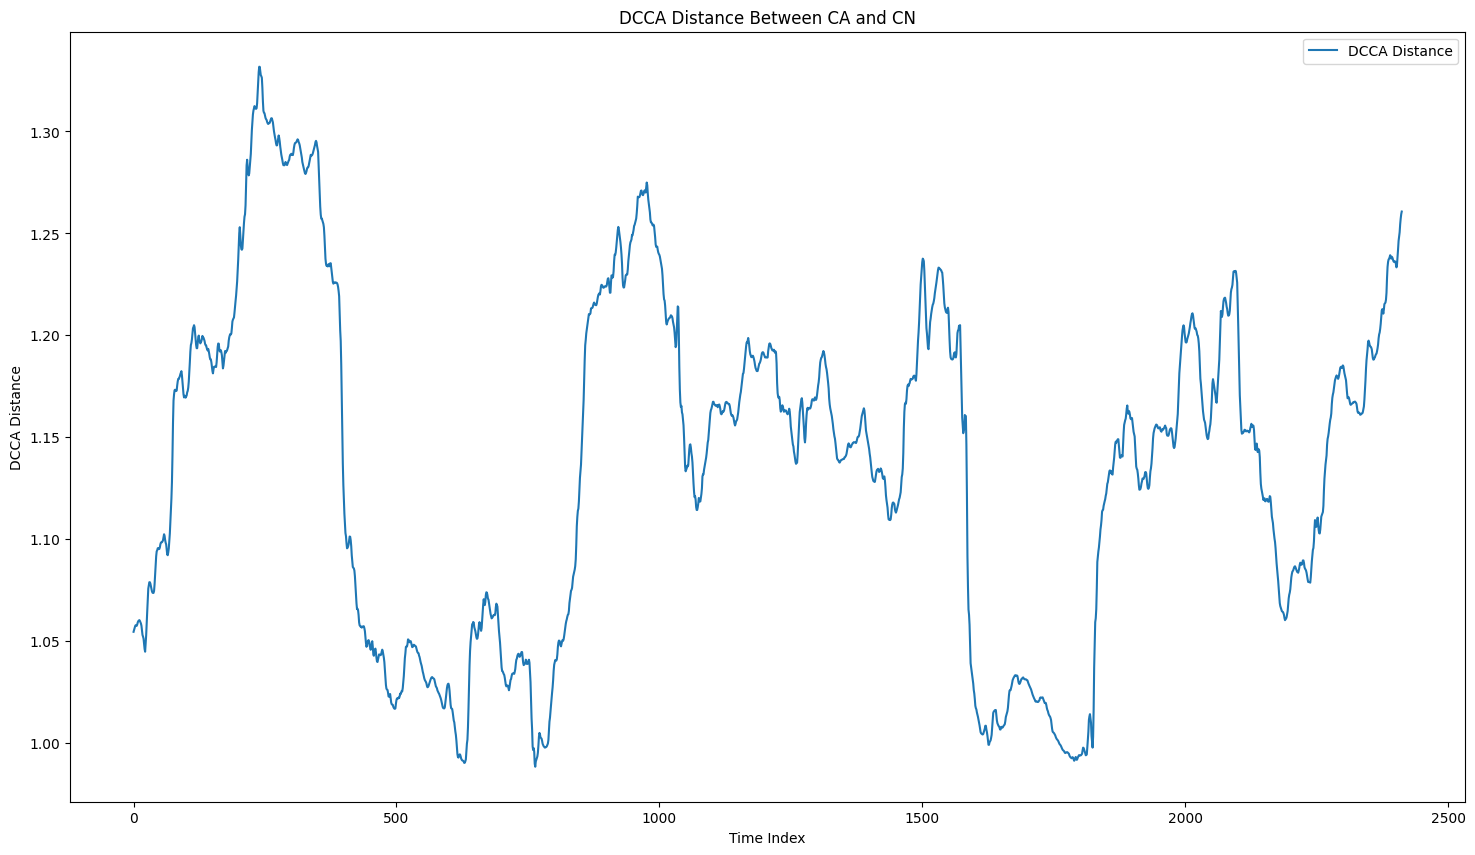

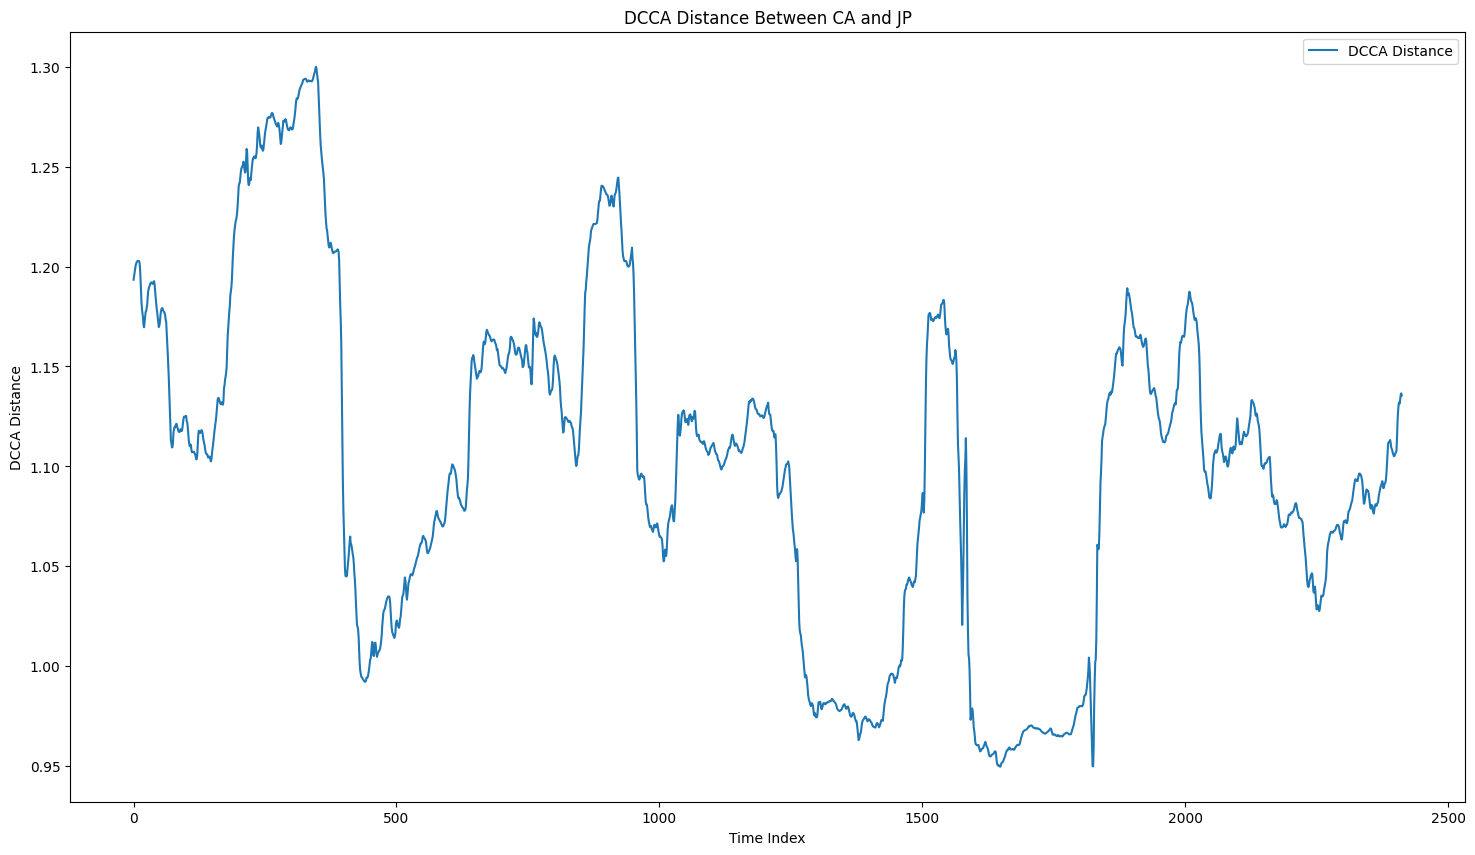

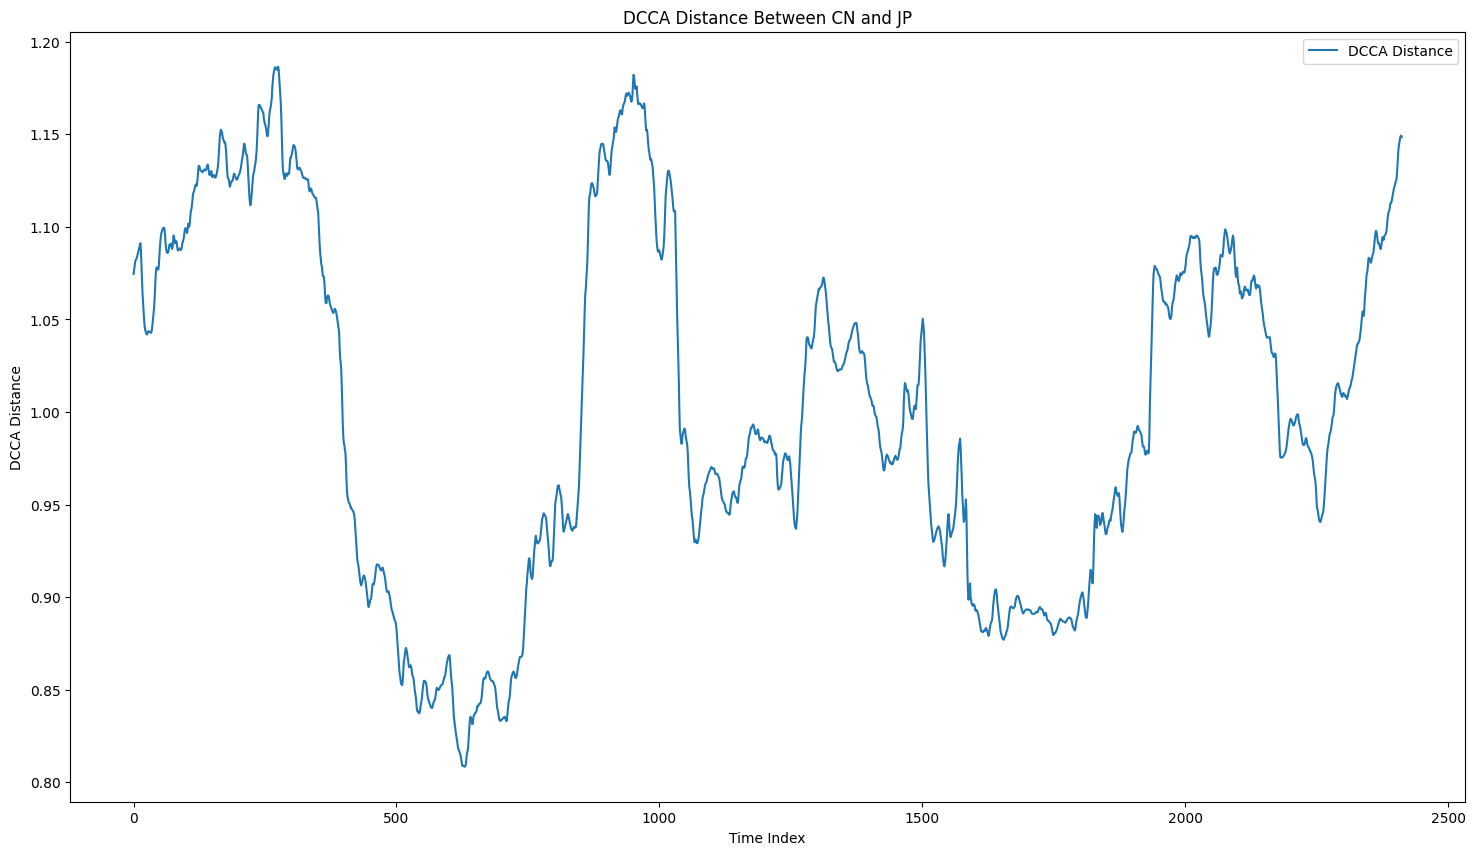

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# 假设：labels 是标的名称列表，rho_DCCA_matrixdist 是计算得到的距离矩阵
labels = ['IT', 'RU', 'FR', 'UK', 'DE', 'US', 'CA', 'CN', 'JP']
n = len(labels) 

# 循环绘制所有对标的间的DCCA距离
for i in range(n):
    for j in range(i + 1, n):  # 避免重复绘制，只取上三角矩阵部分

        plt.figure(figsize=(18, 10))
        
        # 绘制DCCA距离时间序列
        plt.plot(rho_DCCA_matrixdist[i, j, :], label=f'DCCA Distance')

        plt.legend()

        # 设置标题和坐标轴标签
        title = f'DCCA Distance Between {labels[i]} and {labels[j]}'
        plt.title(title)
        plt.xlabel('Time Index')
        plt.ylabel('DCCA Distance')

        #plt.savefig(f'{labels[i]}_{labels[j]}_DCCA_Distance.png')
        
        # 显示图表
        plt.show()